In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.lines import Line2D
import seaborn as sns
import subprocess


def get_repo_root():
    try:
        # This command returns the absolute path of the repository root.
        repo_root = subprocess.check_output(
            ["git", "rev-parse", "--show-toplevel"], stderr=subprocess.STDOUT
        ).strip().decode("utf-8")
        return repo_root
    except subprocess.CalledProcessError:
        # If not in a git repository, fall back to current working directory.
        return os.getcwd()

repo_root = get_repo_root()
print("Repository Root:", repo_root)

def read_csv_files(directory):
    csv_files = []
    print(f"Checking files in directory: {directory}")
    for filename in os.listdir(directory):
        print(f"Found file: {filename}")
        if filename.startswith("sub") and filename.endswith(".csv"):
            print(f"Reading CSV file: {filename}")
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            csv_files.append(df)
        else:
            print(f"Skipping file: {filename}")
    return csv_files

def summarySE(df, measurevar, groupvars, na_rm=True):
    """Compute mean, standard error, and count of observations for each group."""
    # Group by the specified columns
    grouped = df.groupby(groupvars).agg(
        mean=(measurevar, 'mean'),
        count=(measurevar, 'size'),
        std=(measurevar, 'std')
    ).reset_index()
    
    # Calculate standard error
    grouped['se'] = grouped['std'] / np.sqrt(grouped['count'])
    
    # Remove rows with NaNs if na_rm is True
    if na_rm:
        grouped = grouped.dropna()
    
    return grouped

# Set the directory path
directory = os.path.join(repo_root, "data")

# Call the function and get the list of dataframes
dataframes = read_csv_files(directory)

# Display the first few rows of each DataFrame
for i, df in enumerate(dataframes):
    print(f"First few rows of DataFrame {i+1}:")
    print(df.head())
    print("\n")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Repository Root: /Users/alisaloosen/Documents/GitHub/BayesianObserver_CognitiveFlexibilityOCD
Checking files in directory: /Users/alisaloosen/Documents/GitHub/BayesianObserver_CognitiveFlexibilityOCD/data
Found file: Table_CrypticCreaturesShiftRelative_controls_YaleCohort.csv
Skipping file: Table_CrypticCreaturesShiftRelative_controls_YaleCohort.csv
Found file: comparison_chosen_outcome_shift.csv
Skipping file: comparison_chosen_outcome_shift.csv
Found file: .DS_Store
Skipping file: .DS_Store
Found file: comparison_chosen_outcome.csv
Skipping file: comparison_chosen_outcome.csv
Found file: CrypticCreaturesBayesianLearner_relativeID_controls.csv
Skipping file: CrypticCreaturesBayesianLearner_relativeID_controls.csv
Found file: testCrypticCreatures2.csv
Skipping file: testCrypticCreatures2.csv
Found file: avg_confidence_deviation_plot.png
Skipping file: avg_confidence_deviation_plot.png
Found file: CrypticCreaturesBayesianLearner_relativeShift_OCD.csv
Skipping file: CrypticCreaturesBayes

In [2]:
# Set directory to the data folder within the repository.
data_dir = os.path.join(repo_root, "data")
os.chdir(data_dir)

# Load data
CrypticCreatures = pd.read_csv("Table_CrypticCreatures_YaleCohort.csv")
CrypticCreatures.sort_values(by=['id', 'task_id', 'run', 'trial'])
CrypticCreature_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_YaleCohort.csv")
CrypticCreatures_patients_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_patients_YaleCohort.csv")
CrypticCreatures_patients_relativeShift = CrypticCreatures_patients_relativeShift.sort_values(by=['id', 'nTrial_rel'])
CrypticCreatures_controls_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_controls_YaleCohort.csv")
CrypticCreatures_controls_relativeShift = CrypticCreatures_controls_relativeShift.sort_values(by=['id', 'nTrial_rel'])

CrypticCreatures_BayesianLearner = pd.read_csv("CrypticCreatures_BayesianLearner.csv")
CrypticCreatures_BayesianLearner = CrypticCreatures_BayesianLearner.sort_values(by=['id', 'task_id', 'run', 'trial'])
CrypticCreatures_BayesianLearner_patients_relativeShift = pd.read_csv("CrypticCreaturesBayesianLearner_relativeShift_OCD.csv")
CrypticCreatures_BayesianLearner_patients_relativeShift = CrypticCreatures_BayesianLearner_patients_relativeShift.sort_values(by=['id', 'nTrial_rel'])
CrypticCreatures_BayesianLearner_controls_relativeShift = pd.read_csv("CrypticCreaturesBayesianLearner_relativeShift_controls.csv")
CrypticCreatures_BayesianLearner_controls_relativeShift = CrypticCreatures_BayesianLearner_controls_relativeShift.sort_values(by=['id', 'nTrial_rel'])

In [3]:
# Assuming CrypticCreatures_patients_relativeShift is a DataFrame
Cryptic_mean_acc_ID_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy_id', ['nTrial_rel'])
Cryptic_mean_acc_ED_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy_ed', ['nTrial_rel'])
Cryptic_mean_acc_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy', ['nTrial_rel'])

Cryptic_mean_conf_ID_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence_id', ['nTrial_rel'])
Cryptic_mean_conf_ED_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence_ed', ['nTrial_rel'])
Cryptic_mean_conf_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence', ['nTrial_rel'])

Cryptic_mean_acc_ID_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_accuracy_id', ['nTrial_rel'])
Cryptic_mean_acc_ED_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_accuracy_ed', ['nTrial_rel'])
Cryptic_mean_acc_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_accuracy', ['nTrial_rel'])

Cryptic_mean_conf_ID_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_confidence_id', ['nTrial_rel'])
Cryptic_mean_conf_ED_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_confidence_ed', ['nTrial_rel'])
Cryptic_mean_conf_controls= summarySE(CrypticCreatures_controls_relativeShift, 'mean_confidence', ['nTrial_rel'])

#Cryptic_mean_entr_ID_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeID, 'mean_entropy_id', ['nTrial_rel'])
#Cryptic_mean_entr_ED_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeED, 'mean_entropy_ed', ['nTrial_rel'])
Cryptic_mean_entr_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'entropy', ['nTrial_rel'])
Cryptic_mean_entr_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'entropy', ['nTrial_rel'])

Cryptic_mean_sumprior_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'sum_prior_chosen_features', ['nTrial_rel'])
Cryptic_mean_sumprior_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'sum_prior_chosen_features', ['nTrial_rel'])

Cryptic_mean_BLR_confidence_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'BLR_confidence', ['nTrial_rel'])
Cryptic_mean_BLR_confidence_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'BLR_confidence', ['nTrial_rel'])

Cryptic_mean_signed_confidence_deviation_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'signed_confidence_deviation', ['nTrial_rel'])
Cryptic_mean_signed_confidence_deviation_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'signed_confidence_deviation', ['nTrial_rel'])

Cryptic_mean_signed_prior_deviation_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'signed_prior_deviation', ['nTrial_rel'])
Cryptic_mean_signed_prior_deviation_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'signed_prior_deviation', ['nTrial_rel'])


In [4]:
# # Create a column for feedback type (1 for correct, 0 for incorrect)
# CrypticCreatures['feedback'] = CrypticCreatures['chosen_outcome'].apply(lambda x: 1 if x == 'correct' else 0)

# # Create lagged columns for feedback and confidence
# CrypticCreatures['prev_feedback'] = CrypticCreatures['feedback'].shift(1)
# CrypticCreatures['prev_confidence'] = CrypticCreatures['confidence'].shift(1)

# # Filter out the first trial as it has no previous feedback
# CrypticCreatures = CrypticCreatures.dropna(subset=['prev_feedback', 'prev_confidence'])


In [5]:
def calculate_summary_rel(df, measurevar, groupvar):
    """
    Calculate mean, standard error, and count for a given measure variable.
    """
    summary = df.groupby(groupvar).agg(
        mean=(measurevar, 'mean'),
        count=(measurevar, 'size'),
        std=(measurevar, 'std')
    ).reset_index()
    summary['stderr'] = summary['std'] / np.sqrt(summary['count'])
    return summary

# data frames
controls_df = CrypticCreatures_controls_relativeShift 
patients_df = CrypticCreatures_patients_relativeShift

# Merge controls dataset based on 'nTrial_rel' and 'id'
controls_merged_df = pd.merge(
    CrypticCreatures_BayesianLearner_controls_relativeShift,
    controls_df,
    on=['nTrial_rel', 'id'],  # Merge on both nTrial_rel and id
    how='inner'  # Use inner join to ensure matching nTrial_rel and id
)

# Merge patients dataset based on 'nTrial_rel' and 'id'
patients_merged_df = pd.merge(
    CrypticCreatures_BayesianLearner_patients_relativeShift,
    patients_df,
    on=['nTrial_rel', 'id'],  # Merge on both nTrial_rel and id
    how='inner'  # Use inner join to ensure matching nTrial_rel and id
)
# List of measure variables for controls and patients
measure_vars = [
    'change_in_mean_accuracy', 'change_in_mean_accuracy_abs', 
    'change_in_mean_accuracy_ed', 'change_in_mean_accuracy_abs_ed', 
    'change_in_mean_accuracy_id', 'change_in_mean_accuracy_abs_id',
    'change_in_mean_confidence', 'change_in_mean_confidence_abs',
    'change_in_mean_confidence_ed', 'change_in_mean_confidence_abs_ed',
    'change_in_mean_confidence_id', 'change_in_mean_confidence_abs_id',
    'signed_confidence_deviation','signed_prior_deviation','mean_confidence','BLR_confidence',
    'mean_accuracy'
    
]

# Calculate summaries for controls and patients
summary_controls_rel = {var: calculate_summary_rel(controls_merged_df, var, 'nTrial_rel') for var in measure_vars}
summary_patients_rel = {var: calculate_summary_rel(patients_merged_df, var, 'nTrial_rel') for var in measure_vars}
print(summary_controls_rel['mean_confidence'])
print(Cryptic_mean_conf_controls)
# 
summary_controls_accuracy = summary_controls_rel['change_in_mean_accuracy']
summary_patients_accuracy = summary_patients_rel['change_in_mean_accuracy']


    nTrial_rel       mean  count        std    stderr
0           -5  68.581449     29  14.445230  2.682412
1           -4  68.668120     29  15.451935  2.869352
2           -3  71.759618     29  14.055153  2.609976
3           -2  71.112077     29  14.916274  2.769882
4           -1  71.488438     29  15.022706  2.789646
5            0  70.743746     29  14.681239  2.726238
6            1  63.581398     29  17.326790  3.217504
7            2  66.193450     29  15.915792  2.955488
8            3  65.990543     29  14.898927  2.766661
9            4  67.972752     29  14.441952  2.681803
10           5  70.193957     29  14.112702  2.620663
    nTrial_rel       mean  count        std        se
0           -5  68.581449     29  14.445230  2.682412
1           -4  68.668120     29  15.451935  2.869352
2           -3  71.759618     29  14.055153  2.609976
3           -2  71.112077     29  14.916274  2.769882
4           -1  71.488438     29  15.022706  2.789646
5            0  70.743746   

In [6]:
import pandas as pd
import numpy as np

def summarySE(data, measurevar, groupvars, na_rm=True):
    """
    Compute summary statistics for a given measure variable.
    
    Parameters:
    - data: DataFrame
    - measurevar: str, the name of the measure variable
    - groupvars: list of str, the names of the grouping variables
    - na_rm: bool, whether to remove NA values
    
    Returns:
    - summary: DataFrame with summary statistics
    """
    # Remove NA values if na_rm is True
    if na_rm:
        data = data.dropna(subset=[measurevar])
    
    # Group by the specified variables and compute the summary statistics
    summary = data.groupby(groupvars).agg(
        mean=(measurevar, 'mean'),
        count=(measurevar, 'size'),
        std=(measurevar, 'std')
    ).reset_index()
    
    # Compute the standard error
    summary['se'] = summary['std'] / np.sqrt(summary['count'])
    
    return summary

# Assuming CrypticCreatures_controls_relativeShift and CrypticCreatures_patients_relativeShift are defined as DataFrames

# Compute summary statistics for controls
Cryptic_mean_confidence_controls = summarySE(
    CrypticCreatures_controls_relativeShift, 
    measurevar="mean_confidence", 
    groupvars=["nTrial_rel"],
    na_rm=True
)

# Compute summary statistics for patients
Cryptic_mean_confidence_patients = summarySE(
    CrypticCreatures_patients_relativeShift, 
    measurevar="mean_confidence", 
    groupvars=["nTrial_rel"],
    na_rm=True
)

# Print the results to compare
print("Summary statistics for controls:")
print(Cryptic_mean_confidence_controls)

print("\nSummary statistics for patients:")
print(Cryptic_mean_confidence_patients)

Summary statistics for controls:
    nTrial_rel       mean  count        std        se
0           -5  68.581449     29  14.445230  2.682412
1           -4  68.668120     29  15.451935  2.869352
2           -3  71.759618     29  14.055153  2.609976
3           -2  71.112077     29  14.916274  2.769882
4           -1  71.488438     29  15.022706  2.789646
5            0  70.743746     29  14.681239  2.726238
6            1  63.581398     29  17.326790  3.217504
7            2  66.193450     29  15.915792  2.955488
8            3  65.990543     29  14.898927  2.766661
9            4  67.972752     29  14.441952  2.681803
10           5  70.193957     29  14.112702  2.620663

Summary statistics for patients:
    nTrial_rel       mean  count        std        se
0           -5  57.071400     29  14.100225  2.618346
1           -4  58.296957     29  13.684178  2.541088
2           -3  62.090602     29  14.146721  2.626980
3           -2  62.249358     29  14.917666  2.770141
4           -1 

Shapiro-Wilk Test for Controls Accuracy: ShapiroResult(statistic=0.9881234765052795, pvalue=0.9804040193557739)
Shapiro-Wilk Test for Patients Accuracy: ShapiroResult(statistic=0.9786548614501953, pvalue=0.8030325770378113)
Levene's Test for Accuracy: LeveneResult(statistic=0.5093940445045972, pvalue=0.47836544208806653)
T-test for Accuracy: T-statistic = -0.5537408166146028, P-value = 0.5819606166633888
Shapiro-Wilk Test for Controls Confidence: ShapiroResult(statistic=0.9681710004806519, pvalue=0.5112010836601257)
Shapiro-Wilk Test for Patients Confidence: ShapiroResult(statistic=0.9771851897239685, pvalue=0.7627307772636414)
Levene's Test for Confidence: LeveneResult(statistic=0.2676445486355925, pvalue=0.6069537933048289)
T-test for Confidence: T-statistic = 2.8749038949572996, P-value = 0.005704095903711212


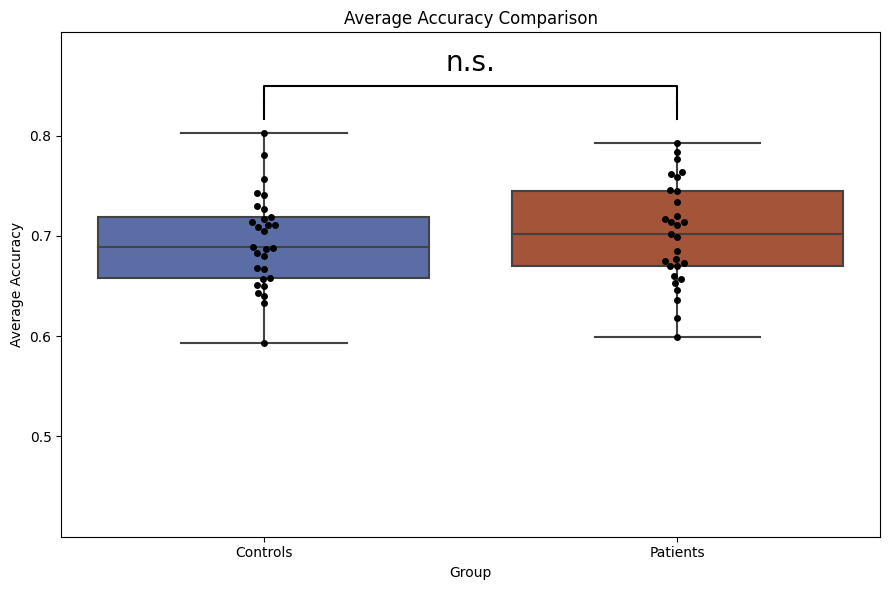

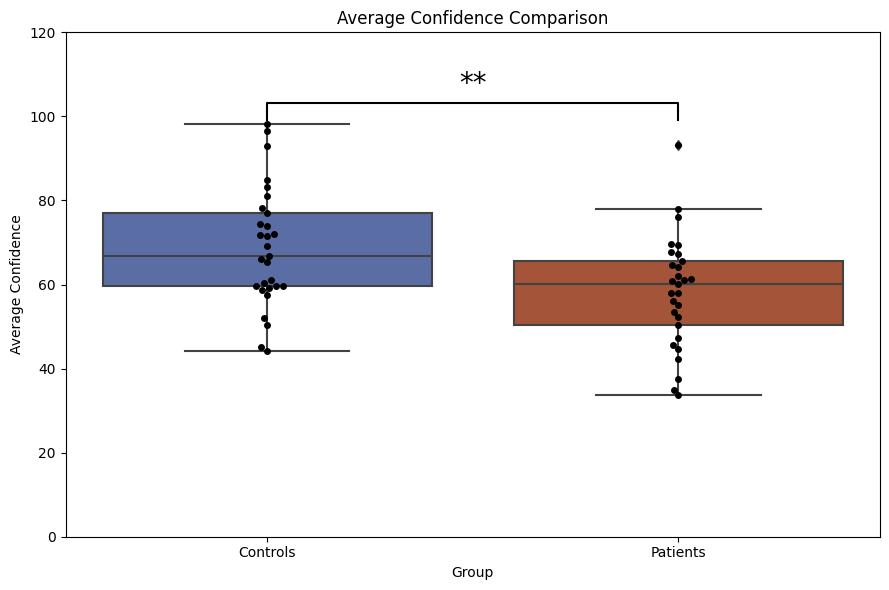

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu

# Assuming CrypticCreatures is your dataset
# CrypticCreatures = pd.read_csv('path_to_CrypticCreatures.csv')

# Compute each individual's average accuracy and confidence
CrypticCreatures['average_accuracy'] = CrypticCreatures.groupby('id')['chosen_outcome'].transform('mean')
CrypticCreatures['average_confidence'] = CrypticCreatures.groupby('id')['confidence'].transform('mean')
average_data = CrypticCreatures[['id', 'average_accuracy', 'average_confidence', 'patientstatus']].drop_duplicates()

# Separate the groups
controls_acc = average_data[average_data['patientstatus'] == 0]['average_accuracy']
patients_acc = average_data[average_data['patientstatus'] == 1]['average_accuracy']
controls_conf = average_data[average_data['patientstatus'] == 0]['average_confidence']
patients_conf = average_data[average_data['patientstatus'] == 1]['average_confidence']

# Function to perform tests and return p-value
def perform_tests(controls, patients, measure_name):
    # Check for normality
    shapiro_controls = shapiro(controls)
    shapiro_patients = shapiro(patients)
    print(f'Shapiro-Wilk Test for Controls {measure_name}: {shapiro_controls}')
    print(f'Shapiro-Wilk Test for Patients {measure_name}: {shapiro_patients}')
    
    # Check for homogeneity of variances
    levene_test = levene(controls, patients)
    print(f'Levene\'s Test for {measure_name}: {levene_test}')
    
    # Perform t-test if assumptions are met, otherwise use Mann-Whitney U test
    if shapiro_controls.pvalue > 0.05 and shapiro_patients.pvalue > 0.05 and levene_test.pvalue > 0.05:
        t_stat, p_value = ttest_ind(controls, patients)
        print(f'T-test for {measure_name}: T-statistic = {t_stat}, P-value = {p_value}')
    else:
        u_stat, p_value = mannwhitneyu(controls, patients)
        print(f'Mann-Whitney U Test for {measure_name}: U-statistic = {u_stat}, P-value = {p_value}')
    return p_value

# Perform tests and get p-values
p_value_acc = perform_tests(controls_acc, patients_acc, 'Accuracy')
p_value_conf = perform_tests(controls_conf, patients_conf, 'Confidence')

# Function to draw significance bracket
def draw_significance_bracket(ax, x1, x2, y, text, height_percent=0.02):
    height = y * height_percent
    ax.plot([x1, x1, x2, x2], [y, y + height, y + height, y], lw=1.5, color='black')
    ax.plot([x1, x1], [y, y - height], lw=1.5, color='black')  # Left vertical line
    ax.plot([x2, x2], [y, y - height], lw=1.5, color='black')  # Right vertical line
    ax.text((x1 + x2) * 0.5, y + height * 1.5, text, ha='center', va='bottom', color='black', fontsize=20)

# Determine significance text based on p-value
def get_significance_text(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'n.s.'

# Plotting function for accuracy
def plot_accuracy_boxplot(average_data, p_value_acc):
    plt.figure(figsize=(9, 6))
    ax = sns.boxplot(x='patientstatus', y='average_accuracy', data=average_data, palette={0: '#4F67B1' , 1: '#B44B28'})
    sns.swarmplot(x='patientstatus', y='average_accuracy', data=average_data, color='black', dodge=True, ax=ax, marker='o', size=5)
    
    # Add significance indication for accuracy
    max_acc = max(average_data['average_accuracy'])
    ylim = max_acc + 0.1
    significance_text = get_significance_text(p_value_acc)
    draw_significance_bracket(ax, 0, 1, ylim - 0.07, significance_text)
    
    ax.set_ylim(0.4, ylim)
    ax.set_xticklabels(['Controls', 'Patients'])
    ax.set_yticks(np.arange(0.5, 0.9, 0.1))
    ax.set_title('Average Accuracy Comparison')
    ax.set_xlabel('Group')
    ax.set_ylabel('Average Accuracy')
    plt.tight_layout()
    plt.show()

# Plotting function for confidence
def plot_confidence_boxplot(average_data, p_value_conf):
    plt.figure(figsize=(9, 6))
    ax = sns.boxplot(x='patientstatus', y='average_confidence', data=average_data, palette={0: '#4F67B1' , 1: '#B44B28'})
    sns.swarmplot(x='patientstatus', y='average_confidence', data=average_data, color='black', dodge=True, ax=ax, marker='o', size=5)
    
    # Add significance indication for confidence
    max_conf = max(average_data['average_confidence'])
    ylim = max_conf + 10
    significance_text = get_significance_text(p_value_conf)
    draw_significance_bracket(ax, 0, 1, ylim - 7, significance_text)
    
    ax.set_ylim(0, ylim)
    ax.set_xticklabels(['Controls', 'Patients'])
    ax.set_yticks(np.arange(0, 121, 20))
    ax.set_title('Average Confidence Comparison')
    ax.set_xlabel('Group')
    ax.set_ylabel('Average Confidence')
    plt.tight_layout()
    plt.show()

# Plot the boxplots separately
plot_accuracy_boxplot(average_data, p_value_acc)
plot_confidence_boxplot(average_data, p_value_conf)

In [8]:
def plot_mean_var(summary_controls, summary_patients, measurevar, title, colors):
    """
    Plot the change in mean var across shifts for controls and patients.
    """
    # Add group labels
    summary_controls['patientstatus'] = 0
    summary_patients['patientstatus'] = 1
    
    # Combine datasets
    df_combined = pd.concat([summary_controls, summary_patients], ignore_index=True)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    for group in [0, 1]:
        subset = df_combined[df_combined['patientstatus'] == group]
        
        # Plot line and scatter points
        sns.lineplot(data=subset, x='nTrial_rel', y='mean', color=colors[group])
        sns.scatterplot(data=subset, x='nTrial_rel', y='mean', color=colors[group], edgecolor=colors[group], s=100, label='Controls' if group == 0 else 'Patients')

        # Add error bars
        plt.errorbar(subset['nTrial_rel'], subset['mean'], yerr=subset['stderr'], fmt='o', color=colors[group], capsize=5)
    
    #plt.axhline(0, color='black', linewidth=1.2, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.ylim(0, 1)
    plt.title(title)
    plt.xlabel('Trial (0=Shifts)')
    plt.ylabel('Mean Accuracy')
    plt.legend(title='Group')
    plt.show()



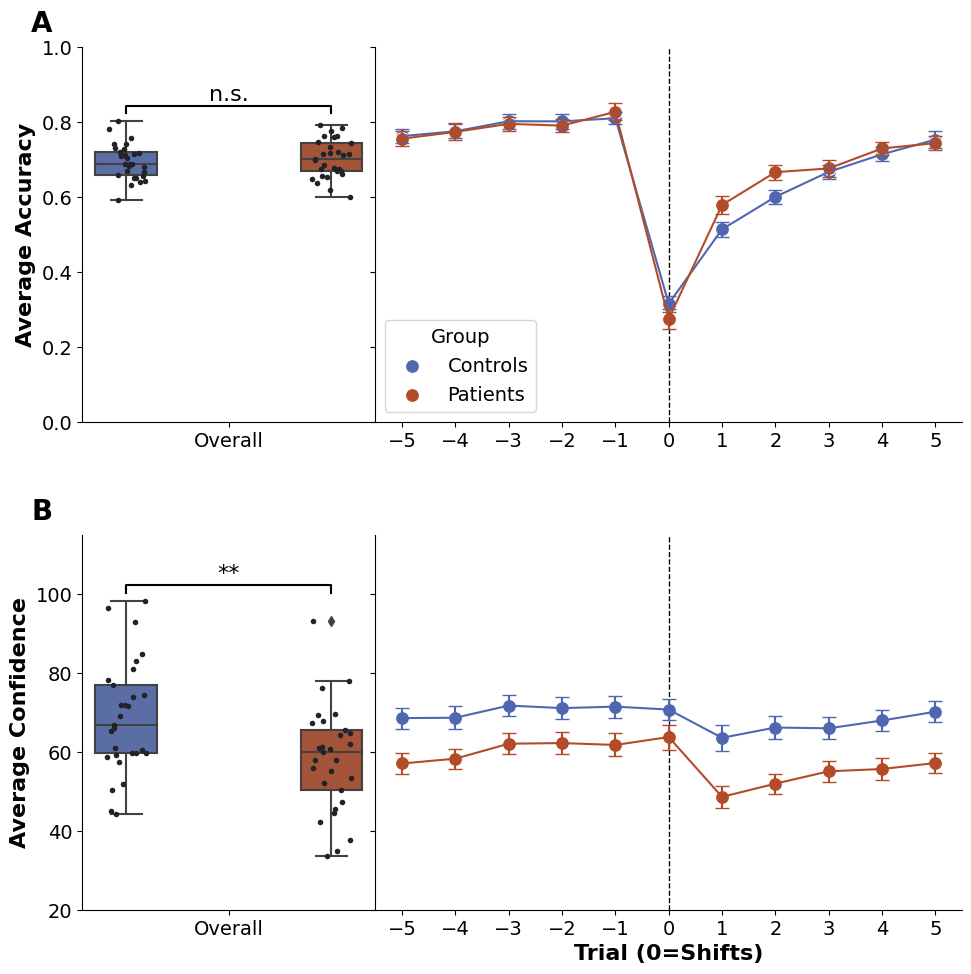

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.lines as mlines

# Optionally, update the global rcParams to set the minimum font size:
plt.rcParams.update({'font.size': 16})

# ============
# (1) Adapted Plot Functions that accept an axis
# ============
def draw_significance_bracket(ax, x1, x2, y, text, height_percent=0.01):
    height = y * height_percent
    ax.plot([x1, x1, x2, x2], [y, y + height, y + height, y], lw=1.5, color='black')
    ax.plot([x1, x1], [y, y - height], lw=1.5, color='black')  # Left vertical line
    ax.plot([x2, x2], [y, y - height], lw=1.5, color='black')  # Right vertical line
    # Significance text is set to 16 (min)
    ax.text((x1 + x2) * 0.5, y + height * 1.5, text, ha='center', va='bottom', 
            color='black', fontsize=16)

def get_significance_text(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'n.s.'
    
def plot_accuracy_boxplot_ax(ax, average_data, p_value_acc):
    # Boxplot and swarmplot:
    sns.boxplot(x='patientstatus', y='average_accuracy', data=average_data, 
                palette={0: '#4F67B1' , 1: '#B44B28'}, ax=ax, width=0.3, linewidth=1.5)
    sns.stripplot(x='patientstatus', y='average_accuracy', data=average_data, 
                  color='#222328', jitter=True, ax=ax, marker='o', size=4)
    # Determine y-limit and add significance bracket:
    max_acc = average_data['average_accuracy'].max()
    ylim = max_acc + 0.1
    significance_text = get_significance_text(p_value_acc)
    draw_significance_bracket(ax, 0, 1, ylim - 0.07, significance_text)
    
    # Format the axis:
    ax.set_ylim(0.4, ylim)
    ax.set_xticks([0.5])
    ax.set_xticklabels(['Overall'])
    ax.set_yticks(np.arange(0.5, 0.9, 0.1))
    ax.set_xlabel(' ')
    # Increase y-label font size to 18:
    ax.set_ylabel('Average Accuracy', fontweight='bold', fontsize=16)
    # Set tick label size to at least 16:
    ax.tick_params(axis='both', labelsize=14)
    
    sns.despine()

def plot_confidence_boxplot_ax(ax, average_data, p_value_conf):
    sns.boxplot(x='patientstatus', y='average_confidence', data=average_data, 
                palette={0: '#4F67B1' , 1: '#B44B28'}, ax=ax, width=0.3,linewidth=1.5)
    sns.stripplot(x='patientstatus', y='average_confidence', data=average_data, 
                  color='#222328', jitter=True, ax=ax, marker='o', size=4)
    
    max_conf = average_data['average_confidence'].max()
    ylim = max_conf + 10
    significance_text = get_significance_text(p_value_conf)
    draw_significance_bracket(ax, 0, 1, ylim - 7, significance_text)
    
    ax.set_ylim(0, ylim)
    ax.set_xticks([0.5])
    ax.set_xticklabels(['Overall'])
    ax.set_yticks(np.arange(0, 121, 20))
    ax.set_xlabel(' ')
    ax.set_ylabel('Average Confidence', fontweight='bold', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    
    sns.despine()

def plot_mean_var_ax(ax, summary_controls, summary_patients, measurevar, ylabel, xlabel, ylim, yticks, colors):
    # Convert inputs to DataFrames and add a group label:
    summary_controls = pd.DataFrame(summary_controls)
    summary_patients = pd.DataFrame(summary_patients)
    summary_controls['patientstatus'] = 'Controls'
    summary_patients['patientstatus'] = 'Patients'
    
    df_combined = pd.concat([summary_controls, summary_patients], ignore_index=True)
    ax.axvline(0, color='black', linewidth=1, linestyle='--')
    # Plot lines, scatter points, and error bars:
    for group_key, color in colors.items():
        label = 'Controls' if group_key == 0 else 'Patients'
        subset = df_combined[df_combined['patientstatus'] == label]
        
        sns.lineplot(data=subset, x='nTrial_rel', y='mean', color=color, ax=ax)
        sns.scatterplot(data=subset, x='nTrial_rel', y='mean', color=color, 
                        edgecolor='white', s=100, label=label, ax=ax)
        ax.errorbar(subset['nTrial_rel'], subset['mean'], yerr=subset['stderr'], 
                    fmt='none', color=color, capsize=5)
    
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.set_xticks(np.arange(-5, 6, 1))
    
    # Increase x- and y-label font sizes to 18:
    ax.set_xlabel(' ', fontsize=16, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.tick_params(axis='both', labelsize=14)

    # Update legend font sizes:
    if measurevar == 'mean_accuracy':
        ax.legend(title='Group', fontsize=14, title_fontsize=14, loc='lower left')
    else:
        legend = ax.get_legend()
        if legend is not None:
            legend.remove()
    sns.despine()

# ============
# (2) Create the Combined Figure
# ============
# (Note: average_data, p_value_acc, p_value_conf, summary_controls_rel, 
# and summary_patients_rel should be defined in your workspace.)

fig, axes = plt.subplots(
    2, 2, 
    figsize=(10, 10), 
    sharey='row', 
    gridspec_kw={'width_ratios': [1, 2], 'wspace': 0}
)

plt.subplots_adjust(wspace=0)

# Plot accuracy boxplot and mean variance plot:
plot_accuracy_boxplot_ax(axes[0, 0], average_data, p_value_acc)
plot_mean_var_ax(axes[0, 1], 
                 summary_controls_rel['mean_accuracy'], 
                 summary_patients_rel['mean_accuracy'], 
                 'mean_accuracy', 'Mean Accuracy',' ',
                 (0, 1), np.arange(0, 1.1, 0.2), 
                 colors={0: '#4F67B1' , 1: '#B44B28'})

# Add 'A' label to the upper left corner of the first row of plots
axes[0, 0].text(-0.1, 1.1, 'A', transform=axes[0, 0].transAxes, 
                fontsize=20, fontweight='bold', va='top', ha='right')

# Plot confidence boxplot and mean variance plot:
plot_confidence_boxplot_ax(axes[1, 0], average_data, p_value_conf)
plot_mean_var_ax(axes[1, 1], 
                 summary_controls_rel['mean_confidence'], 
                 summary_patients_rel['mean_confidence'], 
                 'mean_confidence', 'Mean Confidence', 'Trial (0=Shifts)',
                 (20, 115), np.arange(20, 110, 20), 
                 colors={0: '#4F67B1' , 1: '#B44B28'})

# Add 'B' label to the upper left corner of the second row of plots
axes[1, 0].text(-0.1, 1.1, 'B', transform=axes[1, 0].transAxes, 
                fontsize=20, fontweight='bold', va='top', ha='right')

plt.tight_layout()
# Create the subfolder if it doesn't exist
if not os.path.exists('../figures'):
    os.makedirs('../figures')

# Save the figure into the subfolder
plt.savefig('../figures/Fig2_AccConf_Average.png')
plt.show()


Below are plots to look at changes in variables 


After Incorrect Trials Assumptions (after outlier removal):
  Shapiro p-values: Controls=0.497, Patients=0.094
  Levene p-value: 0.039
After Incorrect Trials: Mann-Whitney U test used
U = 602.000, p = 0.002


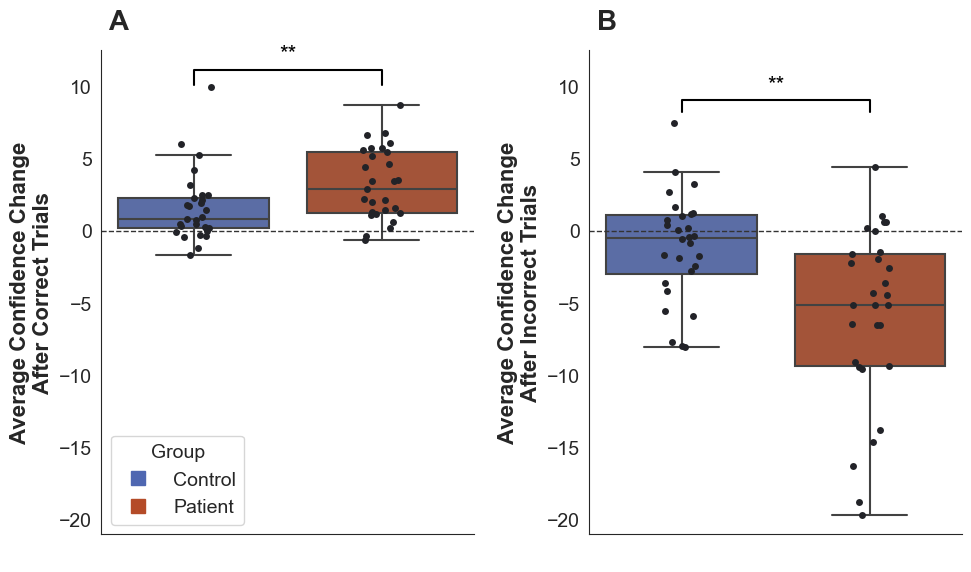

In [18]:
# --- Statistical Test Section for "After Incorrect Trials" ---
if len(after_incorrect_controls) > 0 and len(after_incorrect_patients) > 0:
    # --- Remove outliers in after_incorrect_controls using IQR ---
    Q1_controls = after_incorrect_controls.quantile(0.25)
    Q3_controls = after_incorrect_controls.quantile(0.75)
    IQR_controls = Q3_controls - Q1_controls
    lower_bound_controls = Q1_controls - 3 * IQR_controls
    upper_bound_controls = Q3_controls + 3 * IQR_controls
    filtered_controls = after_incorrect_controls[(after_incorrect_controls >= lower_bound_controls) & 
                                                  (after_incorrect_controls <= upper_bound_controls)]
    
    # --- Remove outliers in after_incorrect_patients using IQR ---
    Q1_patients = after_incorrect_patients.quantile(0.25)
    Q3_patients = after_incorrect_patients.quantile(0.75)
    IQR_patients = Q3_patients - Q1_patients
    lower_bound_patients = Q1_patients - 3 * IQR_patients
    upper_bound_patients = Q3_patients + 3 * IQR_patients
    filtered_patients = after_incorrect_patients[(after_incorrect_patients >= lower_bound_patients) & 
                                                  (after_incorrect_patients <= upper_bound_patients)]
    
    # Check that both filtered groups have data
    if len(filtered_controls) > 0 and len(filtered_patients) > 0:
        # Check normality
        shapiro_controls = shapiro(filtered_controls)
        shapiro_patients = shapiro(filtered_patients)
        # Check variance homogeneity
        levene_test = levene(filtered_controls, filtered_patients)

        print("\nAfter Incorrect Trials Assumptions (after outlier removal):")
        print(f"  Shapiro p-values: Controls={shapiro_controls.pvalue:.3f}, Patients={shapiro_patients.pvalue:.3f}")
        print(f"  Levene p-value: {levene_test.pvalue:.3f}")

        if (shapiro_controls.pvalue > 0.05 and shapiro_patients.pvalue > 0.05) and (levene_test.pvalue > 0.05):
            # Perform t-test
            tstat_incorrect, pval_incorrect = ttest_ind(filtered_controls, filtered_patients)
            print("After Incorrect Trials: t-test used")
            print("t = {:.3f}, p = {:.3f}".format(tstat_incorrect, pval_incorrect))
            significance_incorrect = pval_incorrect
        else:
            # Use nonparametric test
            u_stat, pval_incorrect = mannwhitneyu(filtered_controls, filtered_patients, alternative='two-sided')
            print("After Incorrect Trials: Mann-Whitney U test used")
            print("U = {:.3f}, p = {:.3f}".format(u_stat, pval_incorrect))
            significance_incorrect = pval_incorrect
    else:
        print("Insufficient data for testing after incorrect trials after outlier removal.")
else:
    print("Insufficient data for testing after incorrect trials.")

# --- Plotting Section (Excluding Outliers) ---

# Filter aggregated (per-participant) data for "after_correct"
df_correct = avg_change_pivot[['id', 'after_correct', 'patientstatus']].dropna(subset=['after_correct'])
Q1_correct = df_correct['after_correct'].quantile(0.25)
Q3_correct = df_correct['after_correct'].quantile(0.75)
IQR_correct = Q3_correct - Q1_correct
lower_bound_correct = Q1_correct - 3 * IQR_correct
upper_bound_correct = Q3_correct + 3 * IQR_correct
df_correct_filtered = df_correct[(df_correct['after_correct'] >= lower_bound_correct) & 
                                 (df_correct['after_correct'] <= upper_bound_correct)]

# Filter aggregated (per-participant) data for "after_incorrect"
df_incorrect = avg_change_pivot[['id', 'after_incorrect', 'patientstatus']].dropna(subset=['after_incorrect'])
Q1_incorrect = df_incorrect['after_incorrect'].quantile(0.25)
Q3_incorrect = df_incorrect['after_incorrect'].quantile(0.75)
IQR_incorrect = Q3_incorrect - Q1_incorrect
lower_bound_incorrect = Q1_incorrect - 3 * IQR_incorrect
upper_bound_incorrect = Q3_incorrect + 3 * IQR_incorrect
df_incorrect_filtered = df_incorrect[(df_incorrect['after_incorrect'] >= lower_bound_incorrect) & 
                                     (df_incorrect['after_incorrect'] <= upper_bound_incorrect)]

sns.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Left plot: After Correct Trials (without outliers)
sns.boxplot(
    data=df_correct_filtered,
    x='patientstatus', y='after_correct',
    palette=["#4F67B1", "#B44B28"],
    ax=axes[0],
    showfliers=False
)
sns.stripplot(
    data=df_correct_filtered,
    x='patientstatus', y='after_correct',
    color="#222328",
    size=5,
    jitter=True,
    ax=axes[0]
)
axes[0].axhline(y=0, linestyle="--", color="#333333", linewidth=1)
axes[0].set_xlabel("")
axes[0].set_ylabel("Average Confidence Change\nAfter Correct Trials", fontsize=16, fontweight="bold")
axes[0].set_xticklabels([" ", " "], fontsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].tick_params(axis='x', bottom=False)
sns.despine(ax=axes[0])
axes[0].text(0.02, 1.03, "A", transform=axes[0].transAxes,
             fontsize=20, fontweight="bold", va="bottom", ha="left")

# Right plot: After Incorrect Trials (without outliers)
sns.boxplot(
    data=df_incorrect_filtered,
    x='patientstatus', y='after_incorrect',
    palette=["#4F67B1", "#B44B28"],
    ax=axes[1],
    showfliers=False
)
sns.stripplot(
    data=df_incorrect_filtered,
    x='patientstatus', y='after_incorrect',
    color="#222328",
    size=5,
    jitter=True,
    ax=axes[1]
)
axes[1].axhline(y=0, linestyle="--", color="#333333", linewidth=1)
axes[1].set_xlabel("")
axes[1].set_ylabel("Average Confidence Change\nAfter Incorrect Trials", fontsize=16, fontweight="bold")
axes[1].set_xticklabels([" ", " "], fontsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].tick_params(axis='x', bottom=False)
sns.despine(ax=axes[1])
axes[1].text(0.02, 1.03, "B", transform=axes[1].transAxes,
             fontsize=20, fontweight="bold", va="bottom", ha="left")

# Create legend handles
control_patch = mlines.Line2D([], [], color="#4F67B1", marker="s", linestyle="None", markersize=10, label="Control")
patient_patch = mlines.Line2D([], [], color="#B44B28", marker="s", linestyle="None", markersize=10, label="Patient")
axes[0].legend(handles=[control_patch, patient_patch], title='Group', fontsize=14, title_fontsize=14, loc='lower left')

# Ensure both plots share the same y-limits so the zero-line is aligned
common_ylim = [min(axes[0].get_ylim()[0], axes[1].get_ylim()[0]),
               max(axes[0].get_ylim()[1], axes[1].get_ylim()[1]) + 2]
axes[0].set_ylim(common_ylim)
axes[1].set_ylim(common_ylim)

# --- Add significance brackets using the helper functions ---
if significance_correct is not None:
    sig_text = get_significance_text(significance_correct)
    y_max = df_correct_filtered['after_correct'].max() + 0.15
    draw_significance_bracket(axes[0], 0, 1, y_max, sig_text)
    
if significance_incorrect is not None:
    sig_text = get_significance_text(significance_incorrect)
    y_max = df_incorrect_filtered['after_incorrect'].max() * 1.1
    draw_significance_bracket(axes[1], 0, 1, y_max, sig_text)

plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.lines import Line2D
import seaborn as sns
import subprocess


def get_repo_root():
    try:
        # This command returns the absolute path of the repository root.
        repo_root = subprocess.check_output(
            ["git", "rev-parse", "--show-toplevel"], stderr=subprocess.STDOUT
        ).strip().decode("utf-8")
        return repo_root
    except subprocess.CalledProcessError:
        # If not in a git repository, fall back to current working directory.
        return os.getcwd()

repo_root = get_repo_root()
print("Repository Root:", repo_root)

def read_csv_files(directory):
    csv_files = []
    print(f"Checking files in directory: {directory}")
    for filename in os.listdir(directory):
        print(f"Found file: {filename}")
        if filename.startswith("sub") and filename.endswith(".csv"):
            print(f"Reading CSV file: {filename}")
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            csv_files.append(df)
        else:
            print(f"Skipping file: {filename}")
    return csv_files

def summarySE(df, measurevar, groupvars, na_rm=True):
    """Compute mean, standard error, and count of observations for each group."""
    # Group by the specified columns
    grouped = df.groupby(groupvars).agg(
        mean=(measurevar, 'mean'),
        count=(measurevar, 'size'),
        std=(measurevar, 'std')
    ).reset_index()
    
    # Calculate standard error
    grouped['se'] = grouped['std'] / np.sqrt(grouped['count'])
    
    # Remove rows with NaNs if na_rm is True
    if na_rm:
        grouped = grouped.dropna()
    
    return grouped

# Set the directory path
directory = os.path.join(repo_root, "data")

# Call the function and get the list of dataframes
dataframes = read_csv_files(directory)

# Display the first few rows of each DataFrame
for i, df in enumerate(dataframes):
    print(f"First few rows of DataFrame {i+1}:")
    print(df.head())
    print("\n")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Repository Root: /Users/alisaloosen/Documents/GitHub/BayesianObserver_CognitiveFlexibilityOCD
Checking files in directory: /Users/alisaloosen/Documents/GitHub/BayesianObserver_CognitiveFlexibilityOCD/data
Found file: Table_CrypticCreaturesShiftRelative_controls_YaleCohort.csv
Skipping file: Table_CrypticCreaturesShiftRelative_controls_YaleCohort.csv
Found file: comparison_chosen_outcome_shift.csv
Skipping file: comparison_chosen_outcome_shift.csv
Found file: .DS_Store
Skipping file: .DS_Store
Found file: comparison_chosen_outcome.csv
Skipping file: comparison_chosen_outcome.csv
Found file: CrypticCreaturesBayesianLearner_relativeID_controls.csv
Skipping file: CrypticCreaturesBayesianLearner_relativeID_controls.csv
Found file: testCrypticCreatures2.csv
Skipping file: testCrypticCreatures2.csv
Found file: avg_confidence_deviation_plot.png
Skipping file: avg_confidence_deviation_plot.png
Found file: CrypticCreaturesBayesianLearner_relativeShift_OCD.csv
Skipping file: CrypticCreaturesBayes

In [ ]:
# Set directory to the data folder within the repository.
data_dir = os.path.join(repo_root, "data")
os.chdir(data_dir)

# Load data
CrypticCreatures = pd.read_csv("Table_CrypticCreatures_YaleCohort.csv")
CrypticCreatures.sort_values(by=['id', 'task_id', 'run', 'trial'])
CrypticCreature_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_YaleCohort.csv")
CrypticCreatures_patients_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_patients_YaleCohort.csv")
CrypticCreatures_patients_relativeShift = CrypticCreatures_patients_relativeShift.sort_values(by=['id', 'nTrial_rel'])
CrypticCreatures_controls_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_controls_YaleCohort.csv")
CrypticCreatures_controls_relativeShift = CrypticCreatures_controls_relativeShift.sort_values(by=['id', 'nTrial_rel'])

CrypticCreatures_BayesianLearner = pd.read_csv("CrypticCreatures_BayesianLearner.csv")
CrypticCreatures_BayesianLearner = CrypticCreatures_BayesianLearner.sort_values(by=['id', 'task_id', 'run', 'trial'])
CrypticCreatures_BayesianLearner_patients_relativeShift = pd.read_csv("CrypticCreaturesBayesianLearner_relativeShift_OCD.csv")
CrypticCreatures_BayesianLearner_patients_relativeShift = CrypticCreatures_BayesianLearner_patients_relativeShift.sort_values(by=['id', 'nTrial_rel'])
CrypticCreatures_BayesianLearner_controls_relativeShift = pd.read_csv("CrypticCreaturesBayesianLearner_relativeShift_controls.csv")
CrypticCreatures_BayesianLearner_controls_relativeShift = CrypticCreatures_BayesianLearner_controls_relativeShift.sort_values(by=['id', 'nTrial_rel'])

In [ ]:
# Assuming CrypticCreatures_patients_relativeShift is a DataFrame
Cryptic_mean_acc_ID_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy_id', ['nTrial_rel'])
Cryptic_mean_acc_ED_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy_ed', ['nTrial_rel'])
Cryptic_mean_acc_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy', ['nTrial_rel'])

Cryptic_mean_conf_ID_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence_id', ['nTrial_rel'])
Cryptic_mean_conf_ED_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence_ed', ['nTrial_rel'])
Cryptic_mean_conf_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence', ['nTrial_rel'])

Cryptic_mean_acc_ID_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_accuracy_id', ['nTrial_rel'])
Cryptic_mean_acc_ED_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_accuracy_ed', ['nTrial_rel'])
Cryptic_mean_acc_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_accuracy', ['nTrial_rel'])

Cryptic_mean_conf_ID_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_confidence_id', ['nTrial_rel'])
Cryptic_mean_conf_ED_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_confidence_ed', ['nTrial_rel'])
Cryptic_mean_conf_controls= summarySE(CrypticCreatures_controls_relativeShift, 'mean_confidence', ['nTrial_rel'])

#Cryptic_mean_entr_ID_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeID, 'mean_entropy_id', ['nTrial_rel'])
#Cryptic_mean_entr_ED_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeED, 'mean_entropy_ed', ['nTrial_rel'])
Cryptic_mean_entr_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'entropy', ['nTrial_rel'])
Cryptic_mean_entr_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'entropy', ['nTrial_rel'])

Cryptic_mean_sumprior_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'sum_prior_chosen_features', ['nTrial_rel'])
Cryptic_mean_sumprior_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'sum_prior_chosen_features', ['nTrial_rel'])

Cryptic_mean_BLR_confidence_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'BLR_confidence', ['nTrial_rel'])
Cryptic_mean_BLR_confidence_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'BLR_confidence', ['nTrial_rel'])

Cryptic_mean_signed_confidence_deviation_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'signed_confidence_deviation', ['nTrial_rel'])
Cryptic_mean_signed_confidence_deviation_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'signed_confidence_deviation', ['nTrial_rel'])

Cryptic_mean_signed_prior_deviation_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'signed_prior_deviation', ['nTrial_rel'])
Cryptic_mean_signed_prior_deviation_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'signed_prior_deviation', ['nTrial_rel'])


In [ ]:
# # Create a column for feedback type (1 for correct, 0 for incorrect)
# CrypticCreatures['feedback'] = CrypticCreatures['chosen_outcome'].apply(lambda x: 1 if x == 'correct' else 0)

# # Create lagged columns for feedback and confidence
# CrypticCreatures['prev_feedback'] = CrypticCreatures['feedback'].shift(1)
# CrypticCreatures['prev_confidence'] = CrypticCreatures['confidence'].shift(1)

# # Filter out the first trial as it has no previous feedback
# CrypticCreatures = CrypticCreatures.dropna(subset=['prev_feedback', 'prev_confidence'])


In [ ]:
def calculate_summary_rel(df, measurevar, groupvar):
    """
    Calculate mean, standard error, and count for a given measure variable.
    """
    summary = df.groupby(groupvar).agg(
        mean=(measurevar, 'mean'),
        count=(measurevar, 'size'),
        std=(measurevar, 'std')
    ).reset_index()
    summary['stderr'] = summary['std'] / np.sqrt(summary['count'])
    return summary

# data frames
controls_df = CrypticCreatures_controls_relativeShift 
patients_df = CrypticCreatures_patients_relativeShift

# Merge controls dataset based on 'nTrial_rel' and 'id'
controls_merged_df = pd.merge(
    CrypticCreatures_BayesianLearner_controls_relativeShift,
    controls_df,
    on=['nTrial_rel', 'id'],  # Merge on both nTrial_rel and id
    how='inner'  # Use inner join to ensure matching nTrial_rel and id
)

# Merge patients dataset based on 'nTrial_rel' and 'id'
patients_merged_df = pd.merge(
    CrypticCreatures_BayesianLearner_patients_relativeShift,
    patients_df,
    on=['nTrial_rel', 'id'],  # Merge on both nTrial_rel and id
    how='inner'  # Use inner join to ensure matching nTrial_rel and id
)
# List of measure variables for controls and patients
measure_vars = [
    'change_in_mean_accuracy', 'change_in_mean_accuracy_abs', 
    'change_in_mean_accuracy_ed', 'change_in_mean_accuracy_abs_ed', 
    'change_in_mean_accuracy_id', 'change_in_mean_accuracy_abs_id',
    'change_in_mean_confidence', 'change_in_mean_confidence_abs',
    'change_in_mean_confidence_ed', 'change_in_mean_confidence_abs_ed',
    'change_in_mean_confidence_id', 'change_in_mean_confidence_abs_id',
    'signed_confidence_deviation','signed_prior_deviation','mean_confidence','BLR_confidence',
    'mean_accuracy'
    
]

# Calculate summaries for controls and patients
summary_controls_rel = {var: calculate_summary_rel(controls_merged_df, var, 'nTrial_rel') for var in measure_vars}
summary_patients_rel = {var: calculate_summary_rel(patients_merged_df, var, 'nTrial_rel') for var in measure_vars}
print(summary_controls_rel['mean_confidence'])
print(Cryptic_mean_conf_controls)
# 
summary_controls_accuracy = summary_controls_rel['change_in_mean_accuracy']
summary_patients_accuracy = summary_patients_rel['change_in_mean_accuracy']


    nTrial_rel       mean  count        std    stderr
0           -5  68.581449     29  14.445230  2.682412
1           -4  68.668120     29  15.451935  2.869352
2           -3  71.759618     29  14.055153  2.609976
3           -2  71.112077     29  14.916274  2.769882
4           -1  71.488438     29  15.022706  2.789646
5            0  70.743746     29  14.681239  2.726238
6            1  63.581398     29  17.326790  3.217504
7            2  66.193450     29  15.915792  2.955488
8            3  65.990543     29  14.898927  2.766661
9            4  67.972752     29  14.441952  2.681803
10           5  70.193957     29  14.112702  2.620663
    nTrial_rel       mean  count        std        se
0           -5  68.581449     29  14.445230  2.682412
1           -4  68.668120     29  15.451935  2.869352
2           -3  71.759618     29  14.055153  2.609976
3           -2  71.112077     29  14.916274  2.769882
4           -1  71.488438     29  15.022706  2.789646
5            0  70.743746   

In [ ]:
import pandas as pd
import numpy as np

def summarySE(data, measurevar, groupvars, na_rm=True):
    """
    Compute summary statistics for a given measure variable.
    
    Parameters:
    - data: DataFrame
    - measurevar: str, the name of the measure variable
    - groupvars: list of str, the names of the grouping variables
    - na_rm: bool, whether to remove NA values
    
    Returns:
    - summary: DataFrame with summary statistics
    """
    # Remove NA values if na_rm is True
    if na_rm:
        data = data.dropna(subset=[measurevar])
    
    # Group by the specified variables and compute the summary statistics
    summary = data.groupby(groupvars).agg(
        mean=(measurevar, 'mean'),
        count=(measurevar, 'size'),
        std=(measurevar, 'std')
    ).reset_index()
    
    # Compute the standard error
    summary['se'] = summary['std'] / np.sqrt(summary['count'])
    
    return summary

# Assuming CrypticCreatures_controls_relativeShift and CrypticCreatures_patients_relativeShift are defined as DataFrames

# Compute summary statistics for controls
Cryptic_mean_confidence_controls = summarySE(
    CrypticCreatures_controls_relativeShift, 
    measurevar="mean_confidence", 
    groupvars=["nTrial_rel"],
    na_rm=True
)

# Compute summary statistics for patients
Cryptic_mean_confidence_patients = summarySE(
    CrypticCreatures_patients_relativeShift, 
    measurevar="mean_confidence", 
    groupvars=["nTrial_rel"],
    na_rm=True
)

# Print the results to compare
print("Summary statistics for controls:")
print(Cryptic_mean_confidence_controls)

print("\nSummary statistics for patients:")
print(Cryptic_mean_confidence_patients)

Summary statistics for controls:
    nTrial_rel       mean  count        std        se
0           -5  68.581449     29  14.445230  2.682412
1           -4  68.668120     29  15.451935  2.869352
2           -3  71.759618     29  14.055153  2.609976
3           -2  71.112077     29  14.916274  2.769882
4           -1  71.488438     29  15.022706  2.789646
5            0  70.743746     29  14.681239  2.726238
6            1  63.581398     29  17.326790  3.217504
7            2  66.193450     29  15.915792  2.955488
8            3  65.990543     29  14.898927  2.766661
9            4  67.972752     29  14.441952  2.681803
10           5  70.193957     29  14.112702  2.620663

Summary statistics for patients:
    nTrial_rel       mean  count        std        se
0           -5  57.071400     29  14.100225  2.618346
1           -4  58.296957     29  13.684178  2.541088
2           -3  62.090602     29  14.146721  2.626980
3           -2  62.249358     29  14.917666  2.770141
4           -1 

Shapiro-Wilk Test for Controls Accuracy: ShapiroResult(statistic=0.9881234765052795, pvalue=0.9804040193557739)
Shapiro-Wilk Test for Patients Accuracy: ShapiroResult(statistic=0.9786548614501953, pvalue=0.8030325770378113)
Levene's Test for Accuracy: LeveneResult(statistic=0.5093940445045972, pvalue=0.47836544208806653)
T-test for Accuracy: T-statistic = -0.5537408166146028, P-value = 0.5819606166633888
Shapiro-Wilk Test for Controls Confidence: ShapiroResult(statistic=0.9681710004806519, pvalue=0.5112010836601257)
Shapiro-Wilk Test for Patients Confidence: ShapiroResult(statistic=0.9771851897239685, pvalue=0.7627307772636414)
Levene's Test for Confidence: LeveneResult(statistic=0.2676445486355925, pvalue=0.6069537933048289)
T-test for Confidence: T-statistic = 2.8749038949572996, P-value = 0.005704095903711212


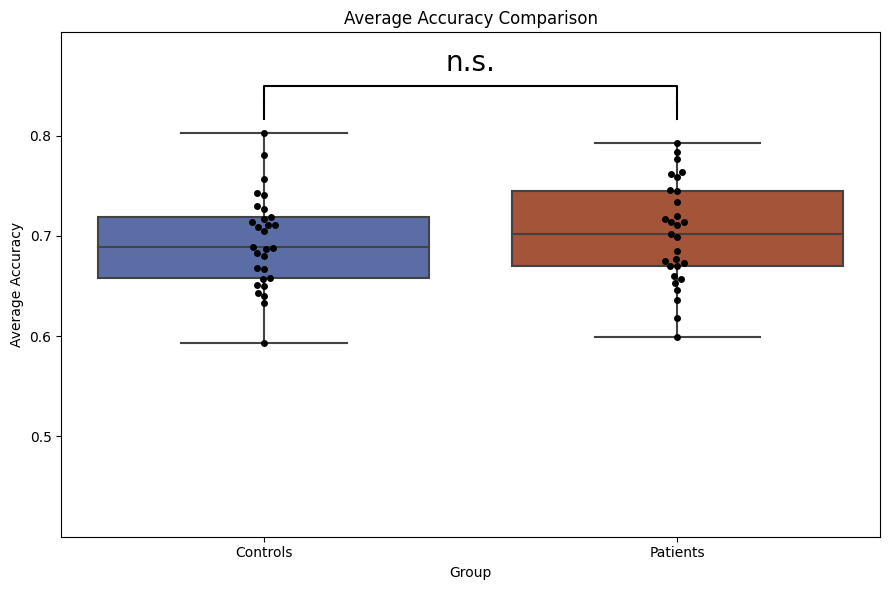

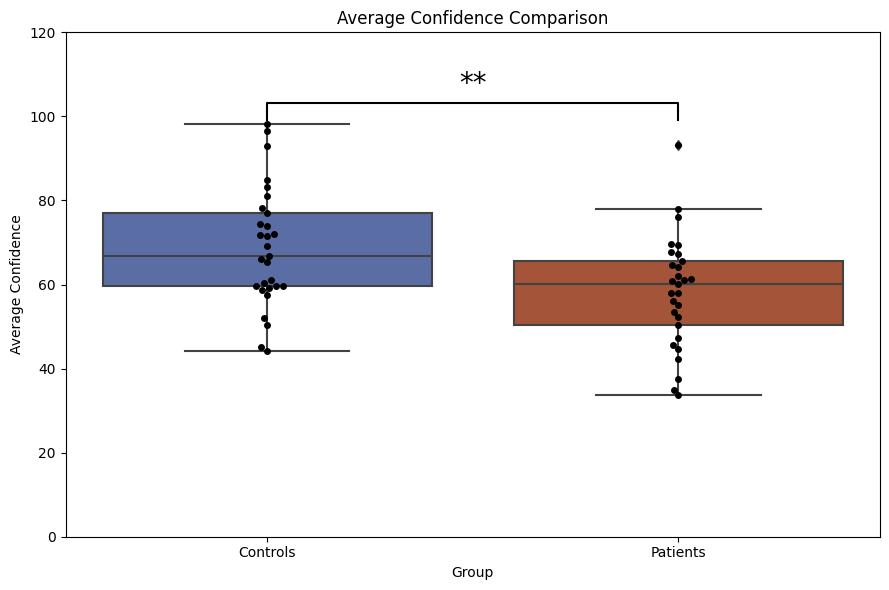

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu

# Assuming CrypticCreatures is your dataset
# CrypticCreatures = pd.read_csv('path_to_CrypticCreatures.csv')

# Compute each individual's average accuracy and confidence
CrypticCreatures['average_accuracy'] = CrypticCreatures.groupby('id')['chosen_outcome'].transform('mean')
CrypticCreatures['average_confidence'] = CrypticCreatures.groupby('id')['confidence'].transform('mean')
average_data = CrypticCreatures[['id', 'average_accuracy', 'average_confidence', 'patientstatus']].drop_duplicates()

# Separate the groups
controls_acc = average_data[average_data['patientstatus'] == 0]['average_accuracy']
patients_acc = average_data[average_data['patientstatus'] == 1]['average_accuracy']
controls_conf = average_data[average_data['patientstatus'] == 0]['average_confidence']
patients_conf = average_data[average_data['patientstatus'] == 1]['average_confidence']

# Function to perform tests and return p-value
def perform_tests(controls, patients, measure_name):
    # Check for normality
    shapiro_controls = shapiro(controls)
    shapiro_patients = shapiro(patients)
    print(f'Shapiro-Wilk Test for Controls {measure_name}: {shapiro_controls}')
    print(f'Shapiro-Wilk Test for Patients {measure_name}: {shapiro_patients}')
    
    # Check for homogeneity of variances
    levene_test = levene(controls, patients)
    print(f'Levene\'s Test for {measure_name}: {levene_test}')
    
    # Perform t-test if assumptions are met, otherwise use Mann-Whitney U test
    if shapiro_controls.pvalue > 0.05 and shapiro_patients.pvalue > 0.05 and levene_test.pvalue > 0.05:
        t_stat, p_value = ttest_ind(controls, patients)
        print(f'T-test for {measure_name}: T-statistic = {t_stat}, P-value = {p_value}')
    else:
        u_stat, p_value = mannwhitneyu(controls, patients)
        print(f'Mann-Whitney U Test for {measure_name}: U-statistic = {u_stat}, P-value = {p_value}')
    return p_value

# Perform tests and get p-values
p_value_acc = perform_tests(controls_acc, patients_acc, 'Accuracy')
p_value_conf = perform_tests(controls_conf, patients_conf, 'Confidence')

# Function to draw significance bracket
def draw_significance_bracket(ax, x1, x2, y, text, height_percent=0.02):
    height = y * height_percent
    ax.plot([x1, x1, x2, x2], [y, y + height, y + height, y], lw=1.5, color='black')
    ax.plot([x1, x1], [y, y - height], lw=1.5, color='black')  # Left vertical line
    ax.plot([x2, x2], [y, y - height], lw=1.5, color='black')  # Right vertical line
    ax.text((x1 + x2) * 0.5, y + height * 1.5, text, ha='center', va='bottom', color='black', fontsize=20)

# Determine significance text based on p-value
def get_significance_text(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'n.s.'

# Plotting function for accuracy
def plot_accuracy_boxplot(average_data, p_value_acc):
    plt.figure(figsize=(9, 6))
    ax = sns.boxplot(x='patientstatus', y='average_accuracy', data=average_data, palette={0: '#4F67B1' , 1: '#B44B28'})
    sns.swarmplot(x='patientstatus', y='average_accuracy', data=average_data, color='black', dodge=True, ax=ax, marker='o', size=5)
    
    # Add significance indication for accuracy
    max_acc = max(average_data['average_accuracy'])
    ylim = max_acc + 0.1
    significance_text = get_significance_text(p_value_acc)
    draw_significance_bracket(ax, 0, 1, ylim - 0.07, significance_text)
    
    ax.set_ylim(0.4, ylim)
    ax.set_xticklabels(['Controls', 'Patients'])
    ax.set_yticks(np.arange(0.5, 0.9, 0.1))
    ax.set_title('Average Accuracy Comparison')
    ax.set_xlabel('Group')
    ax.set_ylabel('Average Accuracy')
    plt.tight_layout()
    plt.show()

# Plotting function for confidence
def plot_confidence_boxplot(average_data, p_value_conf):
    plt.figure(figsize=(9, 6))
    ax = sns.boxplot(x='patientstatus', y='average_confidence', data=average_data, palette={0: '#4F67B1' , 1: '#B44B28'})
    sns.swarmplot(x='patientstatus', y='average_confidence', data=average_data, color='black', dodge=True, ax=ax, marker='o', size=5)
    
    # Add significance indication for confidence
    max_conf = max(average_data['average_confidence'])
    ylim = max_conf + 10
    significance_text = get_significance_text(p_value_conf)
    draw_significance_bracket(ax, 0, 1, ylim - 7, significance_text)
    
    ax.set_ylim(0, ylim)
    ax.set_xticklabels(['Controls', 'Patients'])
    ax.set_yticks(np.arange(0, 121, 20))
    ax.set_title('Average Confidence Comparison')
    ax.set_xlabel('Group')
    ax.set_ylabel('Average Confidence')
    plt.tight_layout()
    plt.show()

# Plot the boxplots separately
plot_accuracy_boxplot(average_data, p_value_acc)
plot_confidence_boxplot(average_data, p_value_conf)

In [ ]:
def plot_mean_var(summary_controls, summary_patients, measurevar, title, colors):
    """
    Plot the change in mean var across shifts for controls and patients.
    """
    # Add group labels
    summary_controls['patientstatus'] = 0
    summary_patients['patientstatus'] = 1
    
    # Combine datasets
    df_combined = pd.concat([summary_controls, summary_patients], ignore_index=True)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    for group in [0, 1]:
        subset = df_combined[df_combined['patientstatus'] == group]
        
        # Plot line and scatter points
        sns.lineplot(data=subset, x='nTrial_rel', y='mean', color=colors[group])
        sns.scatterplot(data=subset, x='nTrial_rel', y='mean', color=colors[group], edgecolor=colors[group], s=100, label='Controls' if group == 0 else 'Patients')

        # Add error bars
        plt.errorbar(subset['nTrial_rel'], subset['mean'], yerr=subset['stderr'], fmt='o', color=colors[group], capsize=5)
    
    #plt.axhline(0, color='black', linewidth=1.2, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.ylim(0, 1)
    plt.title(title)
    plt.xlabel('Trial (0=Shifts)')
    plt.ylabel('Mean Accuracy')
    plt.legend(title='Group')
    plt.show()



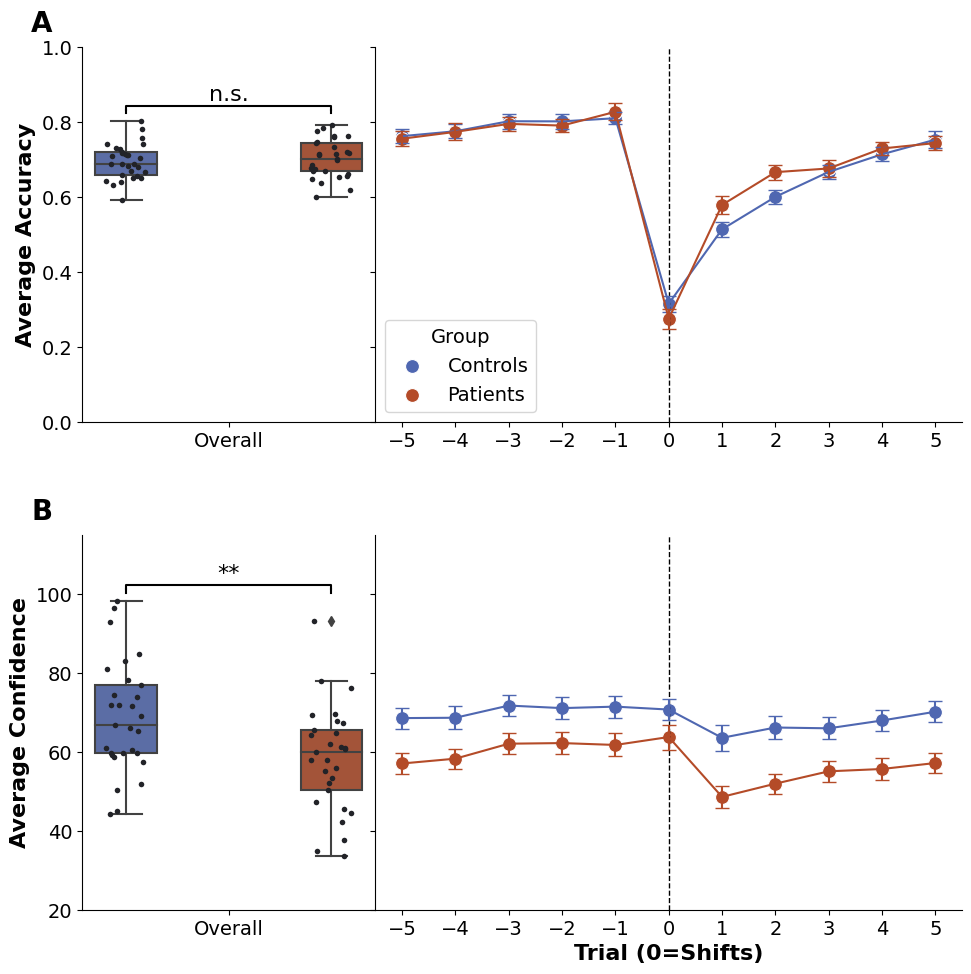

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.lines as mlines

# Optionally, update the global rcParams to set the minimum font size:
plt.rcParams.update({'font.size': 16})

# ============
# (1) Adapted Plot Functions that accept an axis
# ============
def draw_significance_bracket(ax, x1, x2, y, text, height_percent=0.01):
    height = y * height_percent
    ax.plot([x1, x1, x2, x2], [y, y + height, y + height, y], lw=1.5, color='black')
    ax.plot([x1, x1], [y, y - height], lw=1.5, color='black')  # Left vertical line
    ax.plot([x2, x2], [y, y - height], lw=1.5, color='black')  # Right vertical line
    # Significance text is set to 16 (min)
    ax.text((x1 + x2) * 0.5, y + height * 1.5, text, ha='center', va='bottom', 
            color='black', fontsize=16)

def get_significance_text(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'n.s.'
    
def plot_accuracy_boxplot_ax(ax, average_data, p_value_acc):
    # Boxplot and swarmplot:
    sns.boxplot(x='patientstatus', y='average_accuracy', data=average_data, 
                palette={0: '#4F67B1' , 1: '#B44B28'}, ax=ax, width=0.3, linewidth=1.5)
    sns.stripplot(x='patientstatus', y='average_accuracy', data=average_data, 
                  color='#222328', jitter=True, ax=ax, marker='o', size=4)
    # Determine y-limit and add significance bracket:
    max_acc = average_data['average_accuracy'].max()
    ylim = max_acc + 0.1
    significance_text = get_significance_text(p_value_acc)
    draw_significance_bracket(ax, 0, 1, ylim - 0.07, significance_text)
    
    # Format the axis:
    ax.set_ylim(0.4, ylim)
    ax.set_xticks([0.5])
    ax.set_xticklabels(['Overall'])
    ax.set_yticks(np.arange(0.5, 0.9, 0.1))
    ax.set_xlabel(' ')
    # Increase y-label font size to 18:
    ax.set_ylabel('Average Accuracy', fontweight='bold', fontsize=16)
    # Set tick label size to at least 16:
    ax.tick_params(axis='both', labelsize=14)
    
    sns.despine()

def plot_confidence_boxplot_ax(ax, average_data, p_value_conf):
    sns.boxplot(x='patientstatus', y='average_confidence', data=average_data, 
                palette={0: '#4F67B1' , 1: '#B44B28'}, ax=ax, width=0.3,linewidth=1.5)
    sns.stripplot(x='patientstatus', y='average_confidence', data=average_data, 
                  color='#222328', jitter=True, ax=ax, marker='o', size=4)
    
    max_conf = average_data['average_confidence'].max()
    ylim = max_conf + 10
    significance_text = get_significance_text(p_value_conf)
    draw_significance_bracket(ax, 0, 1, ylim - 7, significance_text)
    
    ax.set_ylim(0, ylim)
    ax.set_xticks([0.5])
    ax.set_xticklabels(['Overall'])
    ax.set_yticks(np.arange(0, 121, 20))
    ax.set_xlabel(' ')
    ax.set_ylabel('Average Confidence', fontweight='bold', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    
    sns.despine()

def plot_mean_var_ax(ax, summary_controls, summary_patients, measurevar, ylabel, xlabel, ylim, yticks, colors):
    # Convert inputs to DataFrames and add a group label:
    summary_controls = pd.DataFrame(summary_controls)
    summary_patients = pd.DataFrame(summary_patients)
    summary_controls['patientstatus'] = 'Controls'
    summary_patients['patientstatus'] = 'Patients'
    
    df_combined = pd.concat([summary_controls, summary_patients], ignore_index=True)
    ax.axvline(0, color='black', linewidth=1, linestyle='--')
    # Plot lines, scatter points, and error bars:
    for group_key, color in colors.items():
        label = 'Controls' if group_key == 0 else 'Patients'
        subset = df_combined[df_combined['patientstatus'] == label]
        
        sns.lineplot(data=subset, x='nTrial_rel', y='mean', color=color, ax=ax)
        sns.scatterplot(data=subset, x='nTrial_rel', y='mean', color=color, 
                        edgecolor='white', s=100, label=label, ax=ax)
        ax.errorbar(subset['nTrial_rel'], subset['mean'], yerr=subset['stderr'], 
                    fmt='none', color=color, capsize=5)
    
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.set_xticks(np.arange(-5, 6, 1))
    
    # Increase x- and y-label font sizes to 18:
    ax.set_xlabel(' ', fontsize=16, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.tick_params(axis='both', labelsize=14)

    # Update legend font sizes:
    if measurevar == 'mean_accuracy':
        ax.legend(title='Group', fontsize=14, title_fontsize=14, loc='lower left')
    else:
        legend = ax.get_legend()
        if legend is not None:
            legend.remove()
    sns.despine()

# ============
# (2) Create the Combined Figure
# ============
# (Note: average_data, p_value_acc, p_value_conf, summary_controls_rel, 
# and summary_patients_rel should be defined in your workspace.)

fig, axes = plt.subplots(
    2, 2, 
    figsize=(10, 10), 
    sharey='row', 
    gridspec_kw={'width_ratios': [1, 2], 'wspace': 0}
)

plt.subplots_adjust(wspace=0)

# Plot accuracy boxplot and mean variance plot:
plot_accuracy_boxplot_ax(axes[0, 0], average_data, p_value_acc)
plot_mean_var_ax(axes[0, 1], 
                 summary_controls_rel['mean_accuracy'], 
                 summary_patients_rel['mean_accuracy'], 
                 'mean_accuracy', 'Mean Accuracy',' ',
                 (0, 1), np.arange(0, 1.1, 0.2), 
                 colors={0: '#4F67B1' , 1: '#B44B28'})

# Add 'A' label to the upper left corner of the first row of plots
axes[0, 0].text(-0.1, 1.1, 'A', transform=axes[0, 0].transAxes, 
                fontsize=20, fontweight='bold', va='top', ha='right')

# Plot confidence boxplot and mean variance plot:
plot_confidence_boxplot_ax(axes[1, 0], average_data, p_value_conf)
plot_mean_var_ax(axes[1, 1], 
                 summary_controls_rel['mean_confidence'], 
                 summary_patients_rel['mean_confidence'], 
                 'mean_confidence', 'Mean Confidence', 'Trial (0=Shifts)',
                 (20, 115), np.arange(20, 110, 20), 
                 colors={0: '#4F67B1' , 1: '#B44B28'})

# Add 'B' label to the upper left corner of the second row of plots
axes[1, 0].text(-0.1, 1.1, 'B', transform=axes[1, 0].transAxes, 
                fontsize=20, fontweight='bold', va='top', ha='right')

plt.tight_layout()
# Create the subfolder if it doesn't exist
if not os.path.exists('../figures'):
    os.makedirs('../figures')

# Save the figure into the subfolder
plt.savefig('../figures/Fig2_AccConf_Average.png')
plt.show()


Below are plots to look at changes in variables 

   id  after_correct  after_incorrect  patientstatus
0   2      -0.636986         4.403846              1
1   4       2.164179        -4.276923              1
2   6       1.072464        -2.254237              1
3   8       5.479452       -13.780000              1
4   9       1.255034         0.617021              1
After Correct Trials Assumptions:
  Shapiro p-values: Controls=0.001, Patients=0.209
  Levene p-value: 0.286
After Correct Trials: Mann-Whitney U test used
U = 242.500, p = 0.006

After Incorrect Trials Assumptions:
  Shapiro p-values: Controls=0.000, Patients=0.094
  Levene p-value: 0.551
After Incorrect Trials: Mann-Whitney U test used
U = 602.000, p = 0.005


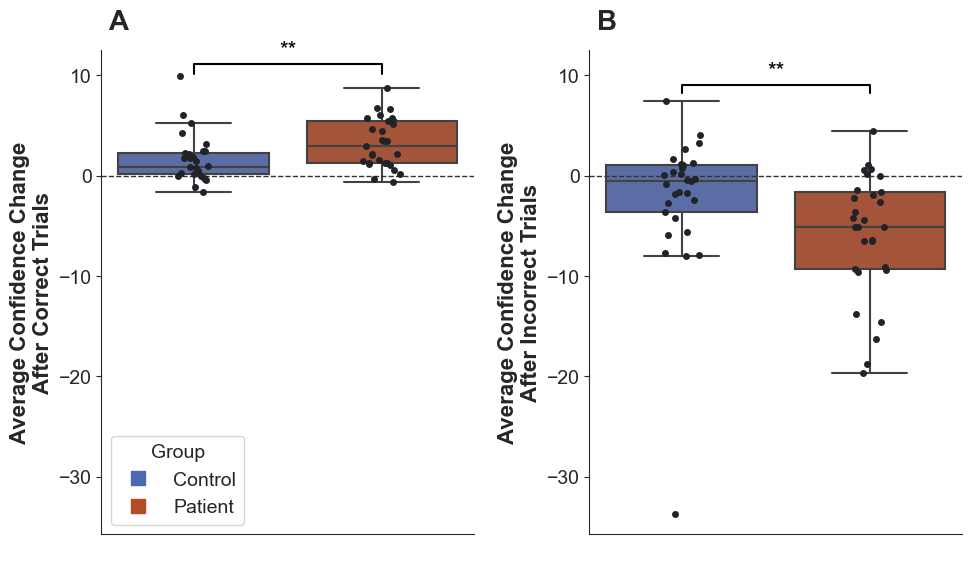

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu
import matplotlib.lines as mlines

# Update global font size
plt.rcParams.update({'font.size': 16})

# --- Helper Functions for Significance Annotation ---
def draw_significance_bracket(ax, x1, x2, y, text, height_percent=0.1):
    height = y * height_percent
    # Draw bracket
    ax.plot([x1, x1, x2, x2], [y, y + height, y + height, y], lw=1.5, color='black')
    # Place significance text
    ax.text((x1 + x2) * 0.5, y + height * 1.5, text, ha='center', va='bottom', 
            color='black', fontsize=16)

def get_significance_text(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'n.s.'

# -------------------------------
# 0. Sort and create an overall trial variable ("trial_all")
# -------------------------------
sort_cols = ['id']
for col in ['task_id', 'run', 'trial']:
    if col in CrypticCreatures.columns:
        sort_cols.append(col)
CrypticCreatures = CrypticCreatures.sort_values(by=sort_cols)
CrypticCreatures['trial_all'] = CrypticCreatures.groupby('id').cumcount() + 1

# -------------------------------
# 1. Compute previous trial outcome and change in confidence
# -------------------------------
CrypticCreatures['prev_outcome'] = CrypticCreatures.groupby('id')['chosen_outcome'].shift(1)

# -------------------------------
# 2. Mark trials based on the previous trial's outcome
# -------------------------------
CrypticCreatures['trial_type'] = np.where(
    CrypticCreatures['prev_outcome'] == 1, 'after_correct',
    np.where(CrypticCreatures['prev_outcome'] == 0, 'after_incorrect', np.nan)
)
df_marked = CrypticCreatures.dropna(subset=['trial_type'])

# -------------------------------
# 3. Aggregate the change scores per participant for each trial type
# -------------------------------
avg_change = (
    df_marked.groupby(['id', 'trial_type'])['confidence_change']
    .mean()
    .reset_index()
)
avg_change_pivot = avg_change.pivot(index='id', columns='trial_type', values='confidence_change').reset_index()
avg_change_pivot = avg_change_pivot.drop('nan', axis=1)

# -------------------------------
# 4. Merge patient status information (assuming one value per participant)
# -------------------------------
patient_info = CrypticCreatures.groupby('id')['patientstatus'].first().reset_index()
avg_change_pivot = pd.merge(avg_change_pivot, patient_info, on='id')
print(avg_change_pivot.head())

# -------------------------------
# 5. Group comparisons: tests for each change type (with assumption checks)
# -------------------------------
controls = avg_change_pivot[avg_change_pivot['patientstatus'] == 0]
patients = avg_change_pivot[avg_change_pivot['patientstatus'] == 1]

# Initialize significance p-value storage
significance_correct = None
significance_incorrect = None

# --- After Correct Trials ---
after_correct_controls = controls['after_correct'].dropna()
after_correct_patients = patients['after_correct'].dropna()

if len(after_correct_controls) > 0 and len(after_correct_patients) > 0:
    # Check normality
    shapiro_controls = shapiro(after_correct_controls)
    shapiro_patients = shapiro(after_correct_patients)
    # Check variance homogeneity
    levene_test = levene(after_correct_controls, after_correct_patients)

    print("After Correct Trials Assumptions:")
    print(f"  Shapiro p-values: Controls={shapiro_controls.pvalue:.3f}, Patients={shapiro_patients.pvalue:.3f}")
    print(f"  Levene p-value: {levene_test.pvalue:.3f}")

    if (shapiro_controls.pvalue > 0.05 and shapiro_patients.pvalue > 0.05) and (levene_test.pvalue > 0.05):
        # Perform t-test
        tstat_correct, pval_correct = ttest_ind(after_correct_controls, after_correct_patients)
        print("After Correct Trials: t-test used")
        print("t = {:.3f}, p = {:.3f}".format(tstat_correct, pval_correct))
        significance_correct = pval_correct
    else:
        # Use nonparametric test
        u_stat, pval_correct = mannwhitneyu(after_correct_controls, after_correct_patients, alternative='two-sided')
        print("After Correct Trials: Mann-Whitney U test used")
        print("U = {:.3f}, p = {:.3f}".format(u_stat, pval_correct))
        significance_correct = pval_correct
else:
    print("Insufficient data for testing after correct trials.")

# --- After Incorrect Trials ---
after_incorrect_controls = controls['after_incorrect'].dropna()
after_incorrect_patients = patients['after_incorrect'].dropna()

if len(after_incorrect_controls) > 0 and len(after_incorrect_patients) > 0:
    # Check normality
    shapiro_controls = shapiro(after_incorrect_controls)
    shapiro_patients = shapiro(after_incorrect_patients)
    # Check variance homogeneity
    levene_test = levene(after_incorrect_controls, after_incorrect_patients)

    print("\nAfter Incorrect Trials Assumptions:")
    print(f"  Shapiro p-values: Controls={shapiro_controls.pvalue:.3f}, Patients={shapiro_patients.pvalue:.3f}")
    print(f"  Levene p-value: {levene_test.pvalue:.3f}")

    if (shapiro_controls.pvalue > 0.05 and shapiro_patients.pvalue > 0.05) and (levene_test.pvalue > 0.05):
        # Perform t-test
        tstat_incorrect, pval_incorrect = ttest_ind(after_incorrect_controls, after_incorrect_patients)
        print("After Incorrect Trials: t-test used")
        print("t = {:.3f}, p = {:.3f}".format(tstat_incorrect, pval_incorrect))
        significance_incorrect = pval_incorrect
    else:
        # Use nonparametric test
        u_stat, pval_incorrect = mannwhitneyu(after_incorrect_controls, after_incorrect_patients, alternative='two-sided')
        print("After Incorrect Trials: Mann-Whitney U test used")
        print("U = {:.3f}, p = {:.3f}".format(u_stat, pval_incorrect))
        significance_incorrect = pval_incorrect
else:
    print("Insufficient data for testing after incorrect trials.")

# -------------------------------
# 6. Plot boxplots of average change scores by patient status
# -------------------------------
sns.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Left plot: After Correct Trials
sns.boxplot(
    data=avg_change_pivot,
    x='patientstatus', y='after_correct',
    palette=["#4F67B1", "#B44B28"],
    ax=axes[0],
    showfliers=False
)
sns.stripplot(
    data=avg_change_pivot,
    x='patientstatus', y='after_correct',
    color="#222328",
    size=5,
    jitter=True,
    ax=axes[0]
)
axes[0].axhline(y=0, linestyle="--", color="#333333", linewidth=1)
axes[0].set_xlabel("")
axes[0].set_ylabel("Average Confidence Change\nAfter Correct Trials", fontsize=16, fontweight="bold")
axes[0].set_xticklabels([" ", " "], fontsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].tick_params(axis='x', bottom=None)
axes[0].tick_params(axis='y', left=True)
sns.despine(ax=axes[0])
# Place label A above the plot
axes[0].text(0.02, 1.03, "A", transform=axes[0].transAxes,
             fontsize=20, fontweight="bold", va="bottom", ha="left")

# Right plot: After Incorrect Trials
sns.boxplot(
    data=avg_change_pivot,
    x='patientstatus', y='after_incorrect',
    palette=["#4F67B1", "#B44B28"],
    ax=axes[1],
    showfliers=False
)
sns.stripplot(
    data=avg_change_pivot,
    x='patientstatus', y='after_incorrect',
    color="#222328",
    size=5,
    jitter=True,
    ax=axes[1]
)
axes[1].axhline(y=0, linestyle="--", color="#333333", linewidth=1)
axes[1].set_xlabel("")
axes[1].set_ylabel("Average Confidence Change\nAfter Incorrect Trials", fontsize=16, fontweight="bold")
axes[1].set_xticklabels([" ", " "], fontsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].tick_params(axis='x', bottom=None)
axes[1].tick_params(axis='y', left=True)
sns.despine(ax=axes[1])
# Place label B above the plot
axes[1].text(0.02, 1.03, "B", transform=axes[1].transAxes,
             fontsize=20, fontweight="bold", va="bottom", ha="left")
# Create legend handles
control_patch = mlines.Line2D([], [], color="#4F67B1", marker="s", linestyle="None", markersize=10, label="Control")
patient_patch = mlines.Line2D([], [], color="#B44B28", marker="s", linestyle="None", markersize=10, label="Patient")
axes[0].legend(handles=[control_patch, patient_patch], title='Group', fontsize=14, title_fontsize=14, loc='lower left')
# Ensure both plots share the same y-limits so the zero-line is aligned
common_ylim = [min(axes[0].get_ylim()[0], axes[1].get_ylim()[0]),
               max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])+2]
axes[0].set_ylim(common_ylim)
axes[1].set_ylim(common_ylim)

# --- Add significance brackets using the helper functions ---
if significance_correct is not None:
    sig_text = get_significance_text(significance_correct)
    # Increase padding by adding a constant rather than a multiplier
    y_max = avg_change_pivot['after_correct'].max() + 0.15
    # Increase the bracket height using a higher height_percent value
    draw_significance_bracket(axes[0], 0, 1, y_max, sig_text)
    
if significance_incorrect is not None:
    sig_text = get_significance_text(significance_incorrect)
    # Use the maximum y-value from the after_incorrect data with padding
    y_max = avg_change_pivot['after_incorrect'].max() * 1.1
    draw_significance_bracket(axes[1], 0, 1, y_max, sig_text)

plt.tight_layout()
plt.show()

Regression models

In [ ]:
# import pandas as pd
# import statsmodels.formula.api as smf

# # Create some example data
# df = pd.DataFrame({
#     'y': [1, 2, 3, 4, 5],
#     'x': [2, 1, 4, 3, 5]
# })

# # Fit a simple linear model
# model = smf.ols(formula='y ~ x', data=df).fit()
# print(model.summary())


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Define a helper function to compute z-scores within a group.
def zscore_within(x):
    m = x.mean()
    s = x.std(ddof=0)
    return (x - m) / s if s != 0 else x - m

# ===========================================
# 1. Create the .sc variables
# ===========================================
# Z-score the trial-level 'confidence' variable within each id.
CrypticCreatures['confidence.sc'] = CrypticCreatures.groupby('id')['confidence'].transform(zscore_within)

# For participant-level variables, perform global (across-person) z-scoring.
if 'age' in CrypticCreatures.columns:
    CrypticCreatures['age.sc'] = (CrypticCreatures['age'] - CrypticCreatures['age'].mean()) / CrypticCreatures['age'].std(ddof=0)
if 'icar_totalscore' in CrypticCreatures.columns:
    CrypticCreatures['total_iq.sc'] = (CrypticCreatures['icar_totalscore'] - CrypticCreatures['icar_totalscore'].mean()) / CrypticCreatures['icar_totalscore'].std(ddof=0)

# ===========================================
# 2. Ensure that categorical variables are of type 'category'
# ===========================================
CrypticCreatures['patientstatus'] = CrypticCreatures['patientstatus'].astype('category')
CrypticCreatures['chosen_outcome_shift'] = CrypticCreatures['chosen_outcome_shift'].astype('category')
CrypticCreatures['task_id'] = CrypticCreatures['task_id'].astype('category')

# ===========================================
# 3. Define and fit the mixed-effects regression model
# ===========================================
# # Wrap variable names with dots using Q()
# formula = ("Q('confidence.sc') ~ C(patientstatus)*C(chosen_outcome_shift) + Q('age.sc') + "
#            "gender + Q('total_iq.sc')")

# # Fit the model with random effects:
# #   - Random intercept and slope for chosen_outcome_shift within each id.
# #   - Random intercept for task_id specified in vc_formula.
# model = smf.mixedlm(formula,
#                     data=CrypticCreatures,
#                     groups=CrypticCreatures["id"],
#                     re_formula="1 + C(chosen_outcome_shift)",
#                     vc_formula={"task_id": "0 + C(task_id)"})

# result = model.fit(method='lbfgs', maxiter=100000)
# print(result.summary())


In [ ]:
print(CrypticCreatures['chosen_outcome_shift'])

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11466    1.0
11467    1.0
11468    0.0
11469    0.0
11470    NaN
Name: chosen_outcome_shift, Length: 11471, dtype: category
Categories (2, float64): [0.0, 1.0]


In [ ]:
from pymer4.models import Lmer
import pandas as pd

# Convert columns to strings and then to categorical.
# This ensures that the factor levels are strings, which is what R expects.
CrypticCreatures['patientstatus'] = CrypticCreatures['patientstatus'].astype(str).astype('category')
CrypticCreatures['chosen_outcome_shift'] = CrypticCreatures['chosen_outcome_shift'].astype(str).astype('category')
CrypticCreatures['task_id'] = CrypticCreatures['task_id'].astype(str).astype('category')
if 'gender' in CrypticCreatures.columns:
    CrypticCreatures['gender'] = CrypticCreatures['gender'].astype(str).astype('category')

# Remove any unused categories.
CrypticCreatures['patientstatus'] = CrypticCreatures['patientstatus'].cat.remove_unused_categories()
CrypticCreatures['chosen_outcome_shift'] = CrypticCreatures['chosen_outcome_shift'].cat.remove_unused_categories()
CrypticCreatures['task_id'] = CrypticCreatures['task_id'].cat.remove_unused_categories()
if 'gender' in CrypticCreatures.columns:
    CrypticCreatures['gender'] = CrypticCreatures['gender'].cat.remove_unused_categories()

# Print out the levels to verify.
print("patientstatus levels:", list(CrypticCreatures['patientstatus'].cat.categories))
print("chosen_outcome_shift levels:", list(CrypticCreatures['chosen_outcome_shift'].cat.categories))
print("task_id levels:", list(CrypticCreatures['task_id'].cat.categories))
if 'gender' in CrypticCreatures.columns:
    print("gender levels:", list(CrypticCreatures['gender'].cat.categories))

# Create the factors dictionary using the string levels.
factors = {
    'patientstatus': list(CrypticCreatures['patientstatus'].cat.categories),
    'chosen_outcome_shift': list(CrypticCreatures['chosen_outcome_shift'].cat.categories),
    'task_id': list(CrypticCreatures['task_id'].cat.categories)
}
if 'gender' in CrypticCreatures.columns:
    factors['gender'] = list(CrypticCreatures['gender'].cat.categories)

print("Factors dictionary:", factors)

# Specify and fit the model using pymer4.
model = Lmer("confidence ~ patientstatus * chosen_outcome_shift + age.sc + gender + total_iq.sc + (1+chosen_outcome_shift|id) + (1|task_id)",
             data=CrypticCreatures)
result = model.fit(factors=factors)
print(result)


patientstatus levels: ['0', '1']
chosen_outcome_shift levels: ['0.0', '1.0', 'nan']
task_id levels: ['1', '2', '3']
gender levels: ['0', '1', '2']
Factors dictionary: {'patientstatus': ['0', '1'], 'chosen_outcome_shift': ['0.0', '1.0', 'nan'], 'task_id': ['1', '2', '3'], 'gender': ['0', '1', '2']}
boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: confidence~patientstatus*chosen_outcome_shift+age.sc+gender+total_iq.sc+(1+chosen_outcome_shift|id)+(1|task_id)

Family: gaussian	 Inference: parametric

Number of observations: 11471	 Groups: {'id': 58.0, 'task_id': 3.0}

Log-likelihood: -52447.083 	 AIC: 104930.167

Random effects:

                             Name      Var     Std
id                    (Intercept)  151.295  12.300
id        chosen_outcome_shift1.0   19.881   4.459
id        chosen_outcome_shiftnan  114.500  10.700
task_id               (Intercept)  104.770  10.236
Residual                           536.302  23.158

      

In [ ]:
from pandas.testing import assert_frame_equal
# Import the dataset
testCrypticCreatures = pd.read_csv("testCrypticCreatures2.csv")

# Rename the existing CrypticCreatures to df1
df1 = CrypticCreatures.sort_values(by=['id', 'task_id', 'run', 'trial'])

# Rename the imported dataset to df2
df2 = CrypticCreatures2.sort_values(by=['id', 'task_id', 'run', 'trial'])
try:
    # Use check_exact=False and set tolerances if you expect minor numerical differences.
    assert_frame_equal(df1, df2, check_exact=False, rtol=1e-5, atol=1e-8)
    print("The dataframes are equal!")
except AssertionError as e:
    print("Differences found between dataframes:\n", e)


NameError: name 'CrypticCreatures2' is not defined

In [ ]:
import pandas as pd
import datacompy

# Define join columns
join_cols = ['id', 'task_id', 'run', 'trial']

# Ensure key columns are stripped and converted to numeric
for col in join_cols:
    # Remove leading/trailing spaces (if any)
    df1[col] = df1[col].astype(str).str.strip()
    df2[col] = df2[col].astype(str).str.strip()
    
    # Convert to numeric if applicable
    df1[col] = pd.to_numeric(df1[col], errors='coerce')
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

# Sort both DataFrames and reset the index
df1_sorted = df1.sort_values(by=join_cols).reset_index(drop=True)
df2_sorted = df2.sort_values(by=join_cols).reset_index(drop=True)

# Check sorted order
print("df1_sorted head:")
print(df1_sorted[join_cols].head(20))
print("df2_sorted head:")
print(df2_sorted[join_cols].head(20))

# Compare using datacompy
compare = datacompy.Compare(
    df1_sorted, df2_sorted,
    join_columns=join_cols,
    abs_tol=1e-5,
    rel_tol=1e-5,
    df1_name='df1_sorted',
    df2_name='df2_sorted'
)
print(compare.report())
# Get the unique id values from each DataFrame
ids_df1 = set(df1['id'].unique())
ids_df2 = set(df2['id'].unique())

# Compare the sets
if ids_df1 == ids_df2:
    print("Both DataFrames have the same unique id values.")
else:
    print("The DataFrames have different unique id values.")
    # Show differences if needed:
    print("IDs in df1 but not in df2:", ids_df1 - ids_df2)
    print("IDs in df2 but not in df1:", ids_df2 - ids_df1)


Supplemental Figures

In [ ]:
def plot_change_in_mean_var(summary_controls, summary_patients, measurevar, title, ydesc, colors,ylims):
    """
    Plot the change in mean var across shifts for controls and patients.
    """
    # Add group labels
    summary_controls['patientstatus'] = 0
    summary_patients['patientstatus'] = 1
    
    # Combine datasets
    df_combined = pd.concat([summary_controls, summary_patients], ignore_index=True)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    for group in [0, 1]:
        subset = df_combined[df_combined['patientstatus'] == group]
        
        # Plot line and scatter points
        sns.lineplot(data=subset, x='nTrial_rel', y='mean', color=colors[group])
        sns.scatterplot(data=subset, x='nTrial_rel', y='mean', color=colors[group], edgecolor=colors[group], s=100, label='Controls' if group == 0 else 'Patients')

        # Add error bars
        plt.errorbar(subset['nTrial_rel'], subset['mean'], yerr=subset['stderr'], fmt='o', color=colors[group], capsize=5)
    
    plt.axhline(0, color='black', linewidth=1.2, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.ylim(ylims)
    plt.title(title)
    plt.xlabel('Trial (0=Shifts)')
    plt.ylabel(ydesc)
    plt.legend(title='Group')
    plt.show()


plot_change_in_mean_var(
    summary_controls_rel['change_in_mean_accuracy'], 
    summary_patients_rel['change_in_mean_accuracy'], 
    'change_in_mean_accuracy', 
    ' ', 
    'Accuracy Delta',
    colors = {0: 'olive', 1: 'darkblue'},
    ylims = (-0.7, 0.4)
)


In [ ]:
#confidence 
plot_change_in_mean_var(
    summary_controls_rel['change_in_mean_confidence'], 
    summary_patients_rel['change_in_mean_confidence'], 
    'change_in_mean_confidence', 
    ' ',
    'Confidence Delta',
     colors = {0: '#16463F', 1: '#2D80A7'},
     ylims = (-19,6)
)


Regression models

In [11]:
# import pandas as pd
# import statsmodels.formula.api as smf

# # Create some example data
# df = pd.DataFrame({
#     'y': [1, 2, 3, 4, 5],
#     'x': [2, 1, 4, 3, 5]
# })

# # Fit a simple linear model
# model = smf.ols(formula='y ~ x', data=df).fit()
# print(model.summary())


In [12]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Define a helper function to compute z-scores within a group.
def zscore_within(x):
    m = x.mean()
    s = x.std(ddof=0)
    return (x - m) / s if s != 0 else x - m

# ===========================================
# 1. Create the .sc variables
# ===========================================
# Z-score the trial-level 'confidence' variable within each id.
CrypticCreatures['confidence.sc'] = CrypticCreatures.groupby('id')['confidence'].transform(zscore_within)

# For participant-level variables, perform global (across-person) z-scoring.
if 'age' in CrypticCreatures.columns:
    CrypticCreatures['age.sc'] = (CrypticCreatures['age'] - CrypticCreatures['age'].mean()) / CrypticCreatures['age'].std(ddof=0)
if 'icar_totalscore' in CrypticCreatures.columns:
    CrypticCreatures['total_iq.sc'] = (CrypticCreatures['icar_totalscore'] - CrypticCreatures['icar_totalscore'].mean()) / CrypticCreatures['icar_totalscore'].std(ddof=0)

# ===========================================
# 2. Ensure that categorical variables are of type 'category'
# ===========================================
CrypticCreatures['patientstatus'] = CrypticCreatures['patientstatus'].astype('category')
CrypticCreatures['chosen_outcome_shift'] = CrypticCreatures['chosen_outcome_shift'].astype('category')
CrypticCreatures['task_id'] = CrypticCreatures['task_id'].astype('category')

# ===========================================
# 3. Define and fit the mixed-effects regression model
# ===========================================
# # Wrap variable names with dots using Q()
# formula = ("Q('confidence.sc') ~ C(patientstatus)*C(chosen_outcome_shift) + Q('age.sc') + "
#            "gender + Q('total_iq.sc')")

# # Fit the model with random effects:
# #   - Random intercept and slope for chosen_outcome_shift within each id.
# #   - Random intercept for task_id specified in vc_formula.
# model = smf.mixedlm(formula,
#                     data=CrypticCreatures,
#                     groups=CrypticCreatures["id"],
#                     re_formula="1 + C(chosen_outcome_shift)",
#                     vc_formula={"task_id": "0 + C(task_id)"})

# result = model.fit(method='lbfgs', maxiter=100000)
# print(result.summary())


In [13]:
print(CrypticCreatures['chosen_outcome_shift'])

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11466    1.0
11467    1.0
11468    0.0
11469    0.0
11470    NaN
Name: chosen_outcome_shift, Length: 11471, dtype: category
Categories (2, float64): [0.0, 1.0]


In [14]:
from pymer4.models import Lmer
import pandas as pd

# Convert columns to strings and then to categorical.
# This ensures that the factor levels are strings, which is what R expects.
CrypticCreatures['patientstatus'] = CrypticCreatures['patientstatus'].astype(str).astype('category')
CrypticCreatures['chosen_outcome_shift'] = CrypticCreatures['chosen_outcome_shift'].astype(str).astype('category')
CrypticCreatures['task_id'] = CrypticCreatures['task_id'].astype(str).astype('category')
if 'gender' in CrypticCreatures.columns:
    CrypticCreatures['gender'] = CrypticCreatures['gender'].astype(str).astype('category')

# Remove any unused categories.
CrypticCreatures['patientstatus'] = CrypticCreatures['patientstatus'].cat.remove_unused_categories()
CrypticCreatures['chosen_outcome_shift'] = CrypticCreatures['chosen_outcome_shift'].cat.remove_unused_categories()
CrypticCreatures['task_id'] = CrypticCreatures['task_id'].cat.remove_unused_categories()
if 'gender' in CrypticCreatures.columns:
    CrypticCreatures['gender'] = CrypticCreatures['gender'].cat.remove_unused_categories()

# Print out the levels to verify.
print("patientstatus levels:", list(CrypticCreatures['patientstatus'].cat.categories))
print("chosen_outcome_shift levels:", list(CrypticCreatures['chosen_outcome_shift'].cat.categories))
print("task_id levels:", list(CrypticCreatures['task_id'].cat.categories))
if 'gender' in CrypticCreatures.columns:
    print("gender levels:", list(CrypticCreatures['gender'].cat.categories))

# Create the factors dictionary using the string levels.
factors = {
    'patientstatus': list(CrypticCreatures['patientstatus'].cat.categories),
    'chosen_outcome_shift': list(CrypticCreatures['chosen_outcome_shift'].cat.categories),
    'task_id': list(CrypticCreatures['task_id'].cat.categories)
}
if 'gender' in CrypticCreatures.columns:
    factors['gender'] = list(CrypticCreatures['gender'].cat.categories)

print("Factors dictionary:", factors)

# Specify and fit the model using pymer4.
model = Lmer("confidence ~ patientstatus * chosen_outcome_shift + age.sc + gender + total_iq.sc + (1+chosen_outcome_shift|id) + (1|task_id)",
             data=CrypticCreatures)
result = model.fit(factors=factors)
print(result)


patientstatus levels: ['0', '1']
chosen_outcome_shift levels: ['0.0', '1.0', 'nan']
task_id levels: ['1', '2', '3']
gender levels: ['0', '1', '2']
Factors dictionary: {'patientstatus': ['0', '1'], 'chosen_outcome_shift': ['0.0', '1.0', 'nan'], 'task_id': ['1', '2', '3'], 'gender': ['0', '1', '2']}
boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: confidence~patientstatus*chosen_outcome_shift+age.sc+gender+total_iq.sc+(1+chosen_outcome_shift|id)+(1|task_id)

Family: gaussian	 Inference: parametric

Number of observations: 11471	 Groups: {'id': 58.0, 'task_id': 3.0}

Log-likelihood: -52447.083 	 AIC: 104930.167

Random effects:

                             Name      Var     Std
id                    (Intercept)  151.295  12.300
id        chosen_outcome_shift1.0   19.881   4.459
id        chosen_outcome_shiftnan  114.500  10.700
task_id               (Intercept)  104.770  10.236
Residual                           536.302  23.158

      

In [15]:
from pandas.testing import assert_frame_equal
# Import the dataset
testCrypticCreatures = pd.read_csv("testCrypticCreatures2.csv")

# Rename the existing CrypticCreatures to df1
df1 = CrypticCreatures.sort_values(by=['id', 'task_id', 'run', 'trial'])

# Rename the imported dataset to df2
df2 = CrypticCreatures2.sort_values(by=['id', 'task_id', 'run', 'trial'])
try:
    # Use check_exact=False and set tolerances if you expect minor numerical differences.
    assert_frame_equal(df1, df2, check_exact=False, rtol=1e-5, atol=1e-8)
    print("The dataframes are equal!")
except AssertionError as e:
    print("Differences found between dataframes:\n", e)


NameError: name 'CrypticCreatures2' is not defined

In [ ]:
import pandas as pd
import datacompy

# Define join columns
join_cols = ['id', 'task_id', 'run', 'trial']

# Ensure key columns are stripped and converted to numeric
for col in join_cols:
    # Remove leading/trailing spaces (if any)
    df1[col] = df1[col].astype(str).str.strip()
    df2[col] = df2[col].astype(str).str.strip()
    
    # Convert to numeric if applicable
    df1[col] = pd.to_numeric(df1[col], errors='coerce')
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

# Sort both DataFrames and reset the index
df1_sorted = df1.sort_values(by=join_cols).reset_index(drop=True)
df2_sorted = df2.sort_values(by=join_cols).reset_index(drop=True)

# Check sorted order
print("df1_sorted head:")
print(df1_sorted[join_cols].head(20))
print("df2_sorted head:")
print(df2_sorted[join_cols].head(20))

# Compare using datacompy
compare = datacompy.Compare(
    df1_sorted, df2_sorted,
    join_columns=join_cols,
    abs_tol=1e-5,
    rel_tol=1e-5,
    df1_name='df1_sorted',
    df2_name='df2_sorted'
)
print(compare.report())
# Get the unique id values from each DataFrame
ids_df1 = set(df1['id'].unique())
ids_df2 = set(df2['id'].unique())

# Compare the sets
if ids_df1 == ids_df2:
    print("Both DataFrames have the same unique id values.")
else:
    print("The DataFrames have different unique id values.")
    # Show differences if needed:
    print("IDs in df1 but not in df2:", ids_df1 - ids_df2)
    print("IDs in df2 but not in df1:", ids_df2 - ids_df1)


In [ ]:
import pandas as pd

# Let's assume df1 and df2 are your two DataFrames.
# Ensure they are sorted by 'id' (or by the full key if needed)
df1_sorted = df1.sort_values(by=['id']).reset_index(drop=True)
df2_sorted = df2.sort_values(by=['id']).reset_index(drop=True)

# Merge the DataFrames on 'id'. If id is not unique, you'll need a more complex key.
merged = pd.merge(df1_sorted, df2_sorted, on='id', suffixes=('_df1', '_df2'))

# List the variables in your model:
model_vars = [
    "confidence.sc", 
    "patientstatus", 
    "chosen_outcome_shift", 
    "age.sc", 
    "gender", 
    "total_iq.sc", 
    "task_id"
]

# Compare each variable row by row:
for var in model_vars:
    col1 = f"{var}_df1"
    col2 = f"{var}_df2"
    if col1 in merged.columns and col2 in merged.columns:
        # Create a mask where the two columns differ. For numeric columns, you might
        # want to include a tolerance if needed.
        diff_mask = merged[col1] != merged[col2]
        
        # For numeric columns, you can use np.isclose for tolerance comparisons:
        if pd.api.types.is_numeric_dtype(merged[col1]):
            diff_mask = ~np.isclose(merged[col1], merged[col2], rtol=1e-5, atol=1e-8)
        
        mismatches = merged.loc[diff_mask, ['id', col1, col2]]
        
        if mismatches.empty:
            print(f"All rows match for variable {var}.")
        else:
            print(f"Mismatches found for variable {var}:")
            print(mismatches)
    else:
        print(f"Variable {var} not found in both DataFrames.")


In [ ]:
# For example, for chosen_outcome_shift:
df1['chosen_outcome_shift'] = pd.to_numeric(df1['chosen_outcome_shift'], errors='coerce').round(5)
df2['chosen_outcome_shift'] = pd.to_numeric(df2['chosen_outcome_shift'], errors='coerce').round(5)

# For categorical variables, convert them to strings
for var in ['patientstatus', 'gender']:
    df1[var] = df1[var].astype(str).str.strip()
    df2[var] = df2[var].astype(str).str.strip()

# Do similar conversions for any other columns (like confidence.sc, age.sc, total_iq.sc)
model_vars = ["confidence.sc", "patientstatus", "chosen_outcome_shift", "age.sc", "gender", "total_iq.sc", "id", "task_id"]

for var in model_vars:
    if var not in df1.columns:
        print(f"{var} not found in df1")
    if var not in df2.columns:
        print(f"{var} not found in df2")
join_cols = ['id', 'task_id', 'run', 'trial']
df1_sorted = df1.sort_values(by=join_cols).reset_index(drop=True)
df2_sorted = df2.sort_values(by=join_cols).reset_index(drop=True)

merged = pd.merge(df1_sorted, df2_sorted, on=join_cols, suffixes=('_df1', '_df2'))
pd.set_option('display.max_rows', 100)  # or None to show all

for var in model_vars:
    col1 = f"{var}_df1"
    col2 = f"{var}_df2"
    if col1 in merged.columns and col2 in merged.columns:
        # For numeric columns, compare with tolerance using np.isclose.
        if pd.api.types.is_numeric_dtype(merged[col1]):
            diff_mask = ~np.isclose(merged[col1], merged[col2], rtol=1e-5, atol=1e-8)
        else:
            diff_mask = merged[col1] != merged[col2]
        mismatches = merged.loc[diff_mask, [*join_cols, col1, col2]]
        if mismatches.empty:
            print(f"All rows match for variable {var}.")
        else:
            print(f"\nMismatches found for variable {var}:")
            print(mismatches)
    else:
        print(f"Variable {var} not found in both DataFrames.")
import datacompy

compare = datacompy.Compare(
    df1_sorted, df2_sorted,
    join_columns=join_cols,
    abs_tol=1e-5,
    rel_tol=1e-5,
    df1_name='df1_sorted',
    df2_name='df2_sorted'
)
print(compare.report())


In [ ]:
import pandas as pd
import numpy as np

# Define the key columns for matching (excluding chosen_outcome)
join_cols = ['id', 'task_id', 'run', 'trial']

# Ensure the join columns are numeric (if appropriate)
for col in join_cols:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

# Sort both DataFrames by the join columns and reset the index
df1_sorted = df1.sort_values(by=join_cols).reset_index(drop=True)
df2_sorted = df2.sort_values(by=join_cols).reset_index(drop=True)

# Merge the DataFrames on the key columns, adding suffixes to distinguish chosen_outcome from each dataset
merged = pd.merge(df1_sorted, df2_sorted, on=join_cols, suffixes=('_df1', '_df2'))

# At this point, the merged DataFrame should contain two columns:
#   - chosen_outcome_df1: from the first dataset (df1)
#   - chosen_outcome_df2: from the second dataset (df2)
#
# Optionally, if these columns should be numeric, convert and round them for consistency:
merged['chosen_outcome_df1'] = pd.to_numeric(merged['chosen_outcome_df1'], errors='coerce').round(5)
merged['chosen_outcome_df2'] = pd.to_numeric(merged['chosen_outcome_df2'], errors='coerce').round(5)

# Create a DataFrame containing the join keys and the chosen_outcome variables from both datasets
comparison = merged[join_cols + ['chosen_outcome_df1', 'chosen_outcome_df2']]

# Export the entire comparison to CSV
comparison.to_csv("comparison_chosen_outcome.csv", index=False)
print("Comparison saved to comparison_chosen_outcome.csv")


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.lines import Line2D
import seaborn as sns
import subprocess


def get_repo_root():
    try:
        # This command returns the absolute path of the repository root.
        repo_root = subprocess.check_output(
            ["git", "rev-parse", "--show-toplevel"], stderr=subprocess.STDOUT
        ).strip().decode("utf-8")
        return repo_root
    except subprocess.CalledProcessError:
        # If not in a git repository, fall back to current working directory.
        return os.getcwd()

repo_root = get_repo_root()
print("Repository Root:", repo_root)

def read_csv_files(directory):
    csv_files = []
    print(f"Checking files in directory: {directory}")
    for filename in os.listdir(directory):
        print(f"Found file: {filename}")
        if filename.startswith("sub") and filename.endswith(".csv"):
            print(f"Reading CSV file: {filename}")
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            csv_files.append(df)
        else:
            print(f"Skipping file: {filename}")
    return csv_files

def summarySE(df, measurevar, groupvars, na_rm=True):
    """Compute mean, standard error, and count of observations for each group."""
    # Group by the specified columns
    grouped = df.groupby(groupvars).agg(
        mean=(measurevar, 'mean'),
        count=(measurevar, 'size'),
        std=(measurevar, 'std')
    ).reset_index()
    
    # Calculate standard error
    grouped['se'] = grouped['std'] / np.sqrt(grouped['count'])
    
    # Remove rows with NaNs if na_rm is True
    if na_rm:
        grouped = grouped.dropna()
    
    return grouped

# Set the directory path
directory = os.path.join(repo_root, "data")

# Call the function and get the list of dataframes
dataframes = read_csv_files(directory)

# Display the first few rows of each DataFrame
for i, df in enumerate(dataframes):
    print(f"First few rows of DataFrame {i+1}:")
    print(df.head())
    print("\n")


In [ ]:
# Set directory to the data folder within the repository.
data_dir = os.path.join(repo_root, "data")
os.chdir(data_dir)

# Load data
CrypticCreatures = pd.read_csv("Table_CrypticCreatures_YaleCohort.csv")
CrypticCreatures.sort_values(by=['id', 'task_id', 'run', 'trial'])
CrypticCreatures2 = pd.read_csv("Table_CrypticCreatures_YaleCohort2.csv")
CrypticCreatures2 = CrypticCreatures2.sort_values(by=['id', 'task_id', 'run', 'trial'])
CrypticCreature_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_YaleCohort.csv")
CrypticCreatures_patients_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_patients_YaleCohort.csv")
CrypticCreatures_patients_relativeShift = CrypticCreatures_patients_relativeShift.sort_values(by=['id', 'nTrial_rel'])
CrypticCreatures_controls_relativeShift = pd.read_csv("Table_CrypticCreaturesShiftRelative_controls_YaleCohort.csv")
CrypticCreatures_controls_relativeShift = CrypticCreatures_controls_relativeShift.sort_values(by=['id', 'nTrial_rel'])

CrypticCreatures_BayesianLearner = pd.read_csv("CrypticCreatures_BayesianLearner.csv")
CrypticCreatures_BayesianLearner = CrypticCreatures_BayesianLearner.sort_values(by=['id', 'task_id', 'run', 'trial'])
CrypticCreatures_BayesianLearner_patients_relativeShift = pd.read_csv("CrypticCreaturesBayesianLearner_relativeShift_OCD.csv")
CrypticCreatures_BayesianLearner_patients_relativeShift = CrypticCreatures_BayesianLearner_patients_relativeShift.sort_values(by=['id', 'nTrial_rel'])
CrypticCreatures_BayesianLearner_controls_relativeShift = pd.read_csv("CrypticCreaturesBayesianLearner_relativeShift_controls.csv")
CrypticCreatures_BayesianLearner_controls_relativeShift = CrypticCreatures_BayesianLearner_controls_relativeShift.sort_values(by=['id', 'nTrial_rel'])

In [ ]:
# Assuming CrypticCreatures_patients_relativeShift is a DataFrame
Cryptic_mean_acc_ID_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy_id', ['nTrial_rel'])
Cryptic_mean_acc_ED_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy_ed', ['nTrial_rel'])
Cryptic_mean_acc_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_accuracy', ['nTrial_rel'])

Cryptic_mean_conf_ID_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence_id', ['nTrial_rel'])
Cryptic_mean_conf_ED_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence_ed', ['nTrial_rel'])
Cryptic_mean_conf_patients = summarySE(CrypticCreatures_patients_relativeShift, 'mean_confidence', ['nTrial_rel'])

Cryptic_mean_acc_ID_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_accuracy_id', ['nTrial_rel'])
Cryptic_mean_acc_ED_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_accuracy_ed', ['nTrial_rel'])
Cryptic_mean_acc_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_accuracy', ['nTrial_rel'])

Cryptic_mean_conf_ID_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_confidence_id', ['nTrial_rel'])
Cryptic_mean_conf_ED_controls = summarySE(CrypticCreatures_controls_relativeShift, 'mean_confidence_ed', ['nTrial_rel'])
Cryptic_mean_conf_controls= summarySE(CrypticCreatures_controls_relativeShift, 'mean_confidence', ['nTrial_rel'])

#Cryptic_mean_entr_ID_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeID, 'mean_entropy_id', ['nTrial_rel'])
#Cryptic_mean_entr_ED_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeED, 'mean_entropy_ed', ['nTrial_rel'])
Cryptic_mean_entr_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'entropy', ['nTrial_rel'])
Cryptic_mean_entr_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'entropy', ['nTrial_rel'])

Cryptic_mean_sumprior_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'sum_prior_chosen_features', ['nTrial_rel'])
Cryptic_mean_sumprior_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'sum_prior_chosen_features', ['nTrial_rel'])

Cryptic_mean_BLR_confidence_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'BLR_confidence', ['nTrial_rel'])
Cryptic_mean_BLR_confidence_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'BLR_confidence', ['nTrial_rel'])

Cryptic_mean_signed_confidence_deviation_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'signed_confidence_deviation', ['nTrial_rel'])
Cryptic_mean_signed_confidence_deviation_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'signed_confidence_deviation', ['nTrial_rel'])

Cryptic_mean_signed_prior_deviation_patients = summarySE(CrypticCreatures_BayesianLearner_patients_relativeShift, 'signed_prior_deviation', ['nTrial_rel'])
Cryptic_mean_signed_prior_deviation_controls = summarySE(CrypticCreatures_BayesianLearner_controls_relativeShift, 'signed_prior_deviation', ['nTrial_rel'])


In [ ]:
# # Create a column for feedback type (1 for correct, 0 for incorrect)
# CrypticCreatures['feedback'] = CrypticCreatures['chosen_outcome'].apply(lambda x: 1 if x == 'correct' else 0)

# # Create lagged columns for feedback and confidence
# CrypticCreatures['prev_feedback'] = CrypticCreatures['feedback'].shift(1)
# CrypticCreatures['prev_confidence'] = CrypticCreatures['confidence'].shift(1)

# # Filter out the first trial as it has no previous feedback
# CrypticCreatures = CrypticCreatures.dropna(subset=['prev_feedback', 'prev_confidence'])


In [ ]:
def calculate_summary_rel(df, measurevar, groupvar):
    """
    Calculate mean, standard error, and count for a given measure variable.
    """
    summary = df.groupby(groupvar).agg(
        mean=(measurevar, 'mean'),
        count=(measurevar, 'size'),
        std=(measurevar, 'std')
    ).reset_index()
    summary['stderr'] = summary['std'] / np.sqrt(summary['count'])
    return summary

# data frames
controls_df = CrypticCreatures_controls_relativeShift 
patients_df = CrypticCreatures_patients_relativeShift

# Merge controls dataset based on 'nTrial_rel' and 'id'
controls_merged_df = pd.merge(
    CrypticCreatures_BayesianLearner_controls_relativeShift,
    controls_df,
    on=['nTrial_rel', 'id'],  # Merge on both nTrial_rel and id
    how='inner'  # Use inner join to ensure matching nTrial_rel and id
)

# Merge patients dataset based on 'nTrial_rel' and 'id'
patients_merged_df = pd.merge(
    CrypticCreatures_BayesianLearner_patients_relativeShift,
    patients_df,
    on=['nTrial_rel', 'id'],  # Merge on both nTrial_rel and id
    how='inner'  # Use inner join to ensure matching nTrial_rel and id
)
# List of measure variables for controls and patients
measure_vars = [
    'change_in_mean_accuracy', 'change_in_mean_accuracy_abs', 
    'change_in_mean_accuracy_ed', 'change_in_mean_accuracy_abs_ed', 
    'change_in_mean_accuracy_id', 'change_in_mean_accuracy_abs_id',
    'change_in_mean_confidence', 'change_in_mean_confidence_abs',
    'change_in_mean_confidence_ed', 'change_in_mean_confidence_abs_ed',
    'change_in_mean_confidence_id', 'change_in_mean_confidence_abs_id',
    'signed_confidence_deviation','signed_prior_deviation','mean_confidence','BLR_confidence',
    'mean_accuracy'
    
]

# Calculate summaries for controls and patients
summary_controls_rel = {var: calculate_summary_rel(controls_merged_df, var, 'nTrial_rel') for var in measure_vars}
summary_patients_rel = {var: calculate_summary_rel(patients_merged_df, var, 'nTrial_rel') for var in measure_vars}
print(summary_controls_rel['mean_confidence'])
print(Cryptic_mean_conf_controls)
# 
summary_controls_accuracy = summary_controls_rel['change_in_mean_accuracy']
summary_patients_accuracy = summary_patients_rel['change_in_mean_accuracy']


In [ ]:
import pandas as pd
import numpy as np

def summarySE(data, measurevar, groupvars, na_rm=True):
    """
    Compute summary statistics for a given measure variable.
    
    Parameters:
    - data: DataFrame
    - measurevar: str, the name of the measure variable
    - groupvars: list of str, the names of the grouping variables
    - na_rm: bool, whether to remove NA values
    
    Returns:
    - summary: DataFrame with summary statistics
    """
    # Remove NA values if na_rm is True
    if na_rm:
        data = data.dropna(subset=[measurevar])
    
    # Group by the specified variables and compute the summary statistics
    summary = data.groupby(groupvars).agg(
        mean=(measurevar, 'mean'),
        count=(measurevar, 'size'),
        std=(measurevar, 'std')
    ).reset_index()
    
    # Compute the standard error
    summary['se'] = summary['std'] / np.sqrt(summary['count'])
    
    return summary

# Assuming CrypticCreatures_controls_relativeShift and CrypticCreatures_patients_relativeShift are defined as DataFrames

# Compute summary statistics for controls
Cryptic_mean_confidence_controls = summarySE(
    CrypticCreatures_controls_relativeShift, 
    measurevar="mean_confidence", 
    groupvars=["nTrial_rel"],
    na_rm=True
)

# Compute summary statistics for patients
Cryptic_mean_confidence_patients = summarySE(
    CrypticCreatures_patients_relativeShift, 
    measurevar="mean_confidence", 
    groupvars=["nTrial_rel"],
    na_rm=True
)

# Print the results to compare
print("Summary statistics for controls:")
print(Cryptic_mean_confidence_controls)

print("\nSummary statistics for patients:")
print(Cryptic_mean_confidence_patients)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu

# Assuming CrypticCreatures is your dataset
# CrypticCreatures = pd.read_csv('path_to_CrypticCreatures.csv')

# Compute each individual's average accuracy and confidence
CrypticCreatures['average_accuracy'] = CrypticCreatures.groupby('id')['chosen_outcome'].transform('mean')
CrypticCreatures['average_confidence'] = CrypticCreatures.groupby('id')['confidence'].transform('mean')
average_data = CrypticCreatures[['id', 'average_accuracy', 'average_confidence', 'patientstatus']].drop_duplicates()

# Separate the groups
controls_acc = average_data[average_data['patientstatus'] == 0]['average_accuracy']
patients_acc = average_data[average_data['patientstatus'] == 1]['average_accuracy']
controls_conf = average_data[average_data['patientstatus'] == 0]['average_confidence']
patients_conf = average_data[average_data['patientstatus'] == 1]['average_confidence']

# Function to perform tests and return p-value
def perform_tests(controls, patients, measure_name):
    # Check for normality
    shapiro_controls = shapiro(controls)
    shapiro_patients = shapiro(patients)
    print(f'Shapiro-Wilk Test for Controls {measure_name}: {shapiro_controls}')
    print(f'Shapiro-Wilk Test for Patients {measure_name}: {shapiro_patients}')
    
    # Check for homogeneity of variances
    levene_test = levene(controls, patients)
    print(f'Levene\'s Test for {measure_name}: {levene_test}')
    
    # Perform t-test if assumptions are met, otherwise use Mann-Whitney U test
    if shapiro_controls.pvalue > 0.05 and shapiro_patients.pvalue > 0.05 and levene_test.pvalue > 0.05:
        t_stat, p_value = ttest_ind(controls, patients)
        print(f'T-test for {measure_name}: T-statistic = {t_stat}, P-value = {p_value}')
    else:
        u_stat, p_value = mannwhitneyu(controls, patients)
        print(f'Mann-Whitney U Test for {measure_name}: U-statistic = {u_stat}, P-value = {p_value}')
    return p_value

# Perform tests and get p-values
p_value_acc = perform_tests(controls_acc, patients_acc, 'Accuracy')
p_value_conf = perform_tests(controls_conf, patients_conf, 'Confidence')

# Function to draw significance bracket
def draw_significance_bracket(ax, x1, x2, y, text, height_percent=0.02):
    height = y * height_percent
    ax.plot([x1, x1, x2, x2], [y, y + height, y + height, y], lw=1.5, color='black')
    ax.plot([x1, x1], [y, y - height], lw=1.5, color='black')  # Left vertical line
    ax.plot([x2, x2], [y, y - height], lw=1.5, color='black')  # Right vertical line
    ax.text((x1 + x2) * 0.5, y + height * 1.5, text, ha='center', va='bottom', color='black', fontsize=20)

# Determine significance text based on p-value
def get_significance_text(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'n.s.'

# Plotting function for accuracy
def plot_accuracy_boxplot(average_data, p_value_acc):
    plt.figure(figsize=(9, 6))
    ax = sns.boxplot(x='patientstatus', y='average_accuracy', data=average_data, palette={0: '#4F67B1' , 1: '#B44B28'})
    sns.swarmplot(x='patientstatus', y='average_accuracy', data=average_data, color='black', dodge=True, ax=ax, marker='o', size=5)
    
    # Add significance indication for accuracy
    max_acc = max(average_data['average_accuracy'])
    ylim = max_acc + 0.1
    significance_text = get_significance_text(p_value_acc)
    draw_significance_bracket(ax, 0, 1, ylim - 0.07, significance_text)
    
    ax.set_ylim(0.4, ylim)
    ax.set_xticklabels(['Controls', 'Patients'])
    ax.set_yticks(np.arange(0.5, 0.9, 0.1))
    ax.set_title('Average Accuracy Comparison')
    ax.set_xlabel('Group')
    ax.set_ylabel('Average Accuracy')
    plt.tight_layout()
    plt.show()

# Plotting function for confidence
def plot_confidence_boxplot(average_data, p_value_conf):
    plt.figure(figsize=(9, 6))
    ax = sns.boxplot(x='patientstatus', y='average_confidence', data=average_data, palette={0: '#4F67B1' , 1: '#B44B28'})
    sns.swarmplot(x='patientstatus', y='average_confidence', data=average_data, color='black', dodge=True, ax=ax, marker='o', size=5)
    
    # Add significance indication for confidence
    max_conf = max(average_data['average_confidence'])
    ylim = max_conf + 10
    significance_text = get_significance_text(p_value_conf)
    draw_significance_bracket(ax, 0, 1, ylim - 7, significance_text)
    
    ax.set_ylim(0, ylim)
    ax.set_xticklabels(['Controls', 'Patients'])
    ax.set_yticks(np.arange(0, 121, 20))
    ax.set_title('Average Confidence Comparison')
    ax.set_xlabel('Group')
    ax.set_ylabel('Average Confidence')
    plt.tight_layout()
    plt.show()

# Plot the boxplots separately
plot_accuracy_boxplot(average_data, p_value_acc)
plot_confidence_boxplot(average_data, p_value_conf)

In [ ]:
def plot_mean_var(summary_controls, summary_patients, measurevar, title, colors):
    """
    Plot the change in mean var across shifts for controls and patients.
    """
    # Add group labels
    summary_controls['patientstatus'] = 0
    summary_patients['patientstatus'] = 1
    
    # Combine datasets
    df_combined = pd.concat([summary_controls, summary_patients], ignore_index=True)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    for group in [0, 1]:
        subset = df_combined[df_combined['patientstatus'] == group]
        
        # Plot line and scatter points
        sns.lineplot(data=subset, x='nTrial_rel', y='mean', color=colors[group])
        sns.scatterplot(data=subset, x='nTrial_rel', y='mean', color=colors[group], edgecolor=colors[group], s=100, label='Controls' if group == 0 else 'Patients')

        # Add error bars
        plt.errorbar(subset['nTrial_rel'], subset['mean'], yerr=subset['stderr'], fmt='o', color=colors[group], capsize=5)
    
    #plt.axhline(0, color='black', linewidth=1.2, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.ylim(0, 1)
    plt.title(title)
    plt.xlabel('Trial (0=Shifts)')
    plt.ylabel('Mean Accuracy')
    plt.legend(title='Group')
    plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.lines as mlines

# Optionally, update the global rcParams to set the minimum font size:
plt.rcParams.update({'font.size': 16})

# ============
# (1) Adapted Plot Functions that accept an axis
# ============
def draw_significance_bracket(ax, x1, x2, y, text, height_percent=0.01):
    height = y * height_percent
    ax.plot([x1, x1, x2, x2], [y, y + height, y + height, y], lw=1.5, color='black')
    ax.plot([x1, x1], [y, y - height], lw=1.5, color='black')  # Left vertical line
    ax.plot([x2, x2], [y, y - height], lw=1.5, color='black')  # Right vertical line
    # Significance text is set to 16 (min)
    ax.text((x1 + x2) * 0.5, y + height * 1.5, text, ha='center', va='bottom', 
            color='black', fontsize=16)

def get_significance_text(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'n.s.'
    
def plot_accuracy_boxplot_ax(ax, average_data, p_value_acc):
    # Boxplot and swarmplot:
    sns.boxplot(x='patientstatus', y='average_accuracy', data=average_data, 
                palette={0: '#4F67B1' , 1: '#B44B28'}, ax=ax, width=0.3, linewidth=1.5)
    sns.stripplot(x='patientstatus', y='average_accuracy', data=average_data, 
                  color='#222328', jitter=True, ax=ax, marker='o', size=4)
    # Determine y-limit and add significance bracket:
    max_acc = average_data['average_accuracy'].max()
    ylim = max_acc + 0.1
    significance_text = get_significance_text(p_value_acc)
    draw_significance_bracket(ax, 0, 1, ylim - 0.07, significance_text)
    
    # Format the axis:
    ax.set_ylim(0.4, ylim)
    ax.set_xticks([0.5])
    ax.set_xticklabels(['Overall'])
    ax.set_yticks(np.arange(0.5, 0.9, 0.1))
    ax.set_xlabel(' ')
    # Increase y-label font size to 18:
    ax.set_ylabel('Average Accuracy', fontweight='bold', fontsize=16)
    # Set tick label size to at least 16:
    ax.tick_params(axis='both', labelsize=14)
    
    sns.despine()

def plot_confidence_boxplot_ax(ax, average_data, p_value_conf):
    sns.boxplot(x='patientstatus', y='average_confidence', data=average_data, 
                palette={0: '#4F67B1' , 1: '#B44B28'}, ax=ax, width=0.3,linewidth=1.5)
    sns.stripplot(x='patientstatus', y='average_confidence', data=average_data, 
                  color='#222328', jitter=True, ax=ax, marker='o', size=4)
    
    max_conf = average_data['average_confidence'].max()
    ylim = max_conf + 10
    significance_text = get_significance_text(p_value_conf)
    draw_significance_bracket(ax, 0, 1, ylim - 7, significance_text)
    
    ax.set_ylim(0, ylim)
    ax.set_xticks([0.5])
    ax.set_xticklabels(['Overall'])
    ax.set_yticks(np.arange(0, 121, 20))
    ax.set_xlabel(' ')
    ax.set_ylabel('Average Confidence', fontweight='bold', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    
    sns.despine()

def plot_mean_var_ax(ax, summary_controls, summary_patients, measurevar, ylabel, xlabel, ylim, yticks, colors):
    # Convert inputs to DataFrames and add a group label:
    summary_controls = pd.DataFrame(summary_controls)
    summary_patients = pd.DataFrame(summary_patients)
    summary_controls['patientstatus'] = 'Controls'
    summary_patients['patientstatus'] = 'Patients'
    
    df_combined = pd.concat([summary_controls, summary_patients], ignore_index=True)
    ax.axvline(0, color='black', linewidth=1, linestyle='--')
    # Plot lines, scatter points, and error bars:
    for group_key, color in colors.items():
        label = 'Controls' if group_key == 0 else 'Patients'
        subset = df_combined[df_combined['patientstatus'] == label]
        
        sns.lineplot(data=subset, x='nTrial_rel', y='mean', color=color, ax=ax)
        sns.scatterplot(data=subset, x='nTrial_rel', y='mean', color=color, 
                        edgecolor='white', s=100, label=label, ax=ax)
        ax.errorbar(subset['nTrial_rel'], subset['mean'], yerr=subset['stderr'], 
                    fmt='none', color=color, capsize=5)
    
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.set_xticks(np.arange(-5, 6, 1))
    
    # Increase x- and y-label font sizes to 18:
    ax.set_xlabel(' ', fontsize=16, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.tick_params(axis='both', labelsize=14)

    # Update legend font sizes:
    if measurevar == 'mean_accuracy':
        ax.legend(title='Group', fontsize=14, title_fontsize=14, loc='lower left')
    else:
        legend = ax.get_legend()
        if legend is not None:
            legend.remove()
    sns.despine()

# ============
# (2) Create the Combined Figure
# ============
# (Note: average_data, p_value_acc, p_value_conf, summary_controls_rel, 
# and summary_patients_rel should be defined in your workspace.)

fig, axes = plt.subplots(
    2, 2, 
    figsize=(10, 10), 
    sharey='row', 
    gridspec_kw={'width_ratios': [1, 2], 'wspace': 0}
)

plt.subplots_adjust(wspace=0)

# Plot accuracy boxplot and mean variance plot:
plot_accuracy_boxplot_ax(axes[0, 0], average_data, p_value_acc)
plot_mean_var_ax(axes[0, 1], 
                 summary_controls_rel['mean_accuracy'], 
                 summary_patients_rel['mean_accuracy'], 
                 'mean_accuracy', 'Mean Accuracy',' ',
                 (0, 1), np.arange(0, 1.1, 0.2), 
                 colors={0: '#4F67B1' , 1: '#B44B28'})

# Add 'A' label to the upper left corner of the first row of plots
axes[0, 0].text(-0.1, 1.1, 'A', transform=axes[0, 0].transAxes, 
                fontsize=20, fontweight='bold', va='top', ha='right')

# Plot confidence boxplot and mean variance plot:
plot_confidence_boxplot_ax(axes[1, 0], average_data, p_value_conf)
plot_mean_var_ax(axes[1, 1], 
                 summary_controls_rel['mean_confidence'], 
                 summary_patients_rel['mean_confidence'], 
                 'mean_confidence', 'Mean Confidence', 'Trial (0=Shifts)',
                 (20, 115), np.arange(20, 110, 20), 
                 colors={0: '#4F67B1' , 1: '#B44B28'})

# Add 'B' label to the upper left corner of the second row of plots
axes[1, 0].text(-0.1, 1.1, 'B', transform=axes[1, 0].transAxes, 
                fontsize=20, fontweight='bold', va='top', ha='right')

plt.tight_layout()
# Create the subfolder if it doesn't exist
if not os.path.exists('../figures'):
    os.makedirs('../figures')

# Save the figure into the subfolder
plt.savefig('../figures/Fig2_AccConf_Average.png')
plt.show()


Below are plots to look at changes in variables 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu
import matplotlib.lines as mlines

# Update global font size
plt.rcParams.update({'font.size': 16})

# --- Helper Functions for Significance Annotation ---
def draw_significance_bracket(ax, x1, x2, y, text, height_percent=0.1):
    height = y * height_percent
    # Draw bracket
    ax.plot([x1, x1, x2, x2], [y, y + height, y + height, y], lw=1.5, color='black')
    # Place significance text
    ax.text((x1 + x2) * 0.5, y + height * 1.5, text, ha='center', va='bottom', 
            color='black', fontsize=16)

def get_significance_text(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'n.s.'

# -------------------------------
# 0. Sort and create an overall trial variable ("trial_all")
# -------------------------------
sort_cols = ['id']
for col in ['task_id', 'run', 'trial']:
    if col in CrypticCreatures.columns:
        sort_cols.append(col)
CrypticCreatures = CrypticCreatures.sort_values(by=sort_cols)
CrypticCreatures['trial_all'] = CrypticCreatures.groupby('id').cumcount() + 1

# -------------------------------
# 1. Compute previous trial outcome and change in confidence
# -------------------------------
CrypticCreatures['prev_outcome'] = CrypticCreatures.groupby('id')['chosen_outcome'].shift(1)

# -------------------------------
# 2. Mark trials based on the previous trial's outcome
# -------------------------------
CrypticCreatures['trial_type'] = np.where(
    CrypticCreatures['prev_outcome'] == 1, 'after_correct',
    np.where(CrypticCreatures['prev_outcome'] == 0, 'after_incorrect', np.nan)
)
df_marked = CrypticCreatures.dropna(subset=['trial_type'])

# -------------------------------
# 3. Aggregate the change scores per participant for each trial type
# -------------------------------
avg_change = (
    df_marked.groupby(['id', 'trial_type'])['confidence_change']
    .mean()
    .reset_index()
)
avg_change_pivot = avg_change.pivot(index='id', columns='trial_type', values='confidence_change').reset_index()
avg_change_pivot = avg_change_pivot.drop('nan', axis=1)

# -------------------------------
# 4. Merge patient status information (assuming one value per participant)
# -------------------------------
patient_info = CrypticCreatures.groupby('id')['patientstatus'].first().reset_index()
avg_change_pivot = pd.merge(avg_change_pivot, patient_info, on='id')
print(avg_change_pivot.head())

# -------------------------------
# 5. Group comparisons: tests for each change type (with assumption checks)
# -------------------------------
controls = avg_change_pivot[avg_change_pivot['patientstatus'] == 0]
patients = avg_change_pivot[avg_change_pivot['patientstatus'] == 1]

# Initialize significance p-value storage
significance_correct = None
significance_incorrect = None

# --- After Correct Trials ---
after_correct_controls = controls['after_correct'].dropna()
after_correct_patients = patients['after_correct'].dropna()

if len(after_correct_controls) > 0 and len(after_correct_patients) > 0:
    # Check normality
    shapiro_controls = shapiro(after_correct_controls)
    shapiro_patients = shapiro(after_correct_patients)
    # Check variance homogeneity
    levene_test = levene(after_correct_controls, after_correct_patients)

    print("After Correct Trials Assumptions:")
    print(f"  Shapiro p-values: Controls={shapiro_controls.pvalue:.3f}, Patients={shapiro_patients.pvalue:.3f}")
    print(f"  Levene p-value: {levene_test.pvalue:.3f}")

    if (shapiro_controls.pvalue > 0.05 and shapiro_patients.pvalue > 0.05) and (levene_test.pvalue > 0.05):
        # Perform t-test
        tstat_correct, pval_correct = ttest_ind(after_correct_controls, after_correct_patients)
        print("After Correct Trials: t-test used")
        print("t = {:.3f}, p = {:.3f}".format(tstat_correct, pval_correct))
        significance_correct = pval_correct
    else:
        # Use nonparametric test
        u_stat, pval_correct = mannwhitneyu(after_correct_controls, after_correct_patients, alternative='two-sided')
        print("After Correct Trials: Mann-Whitney U test used")
        print("U = {:.3f}, p = {:.3f}".format(u_stat, pval_correct))
        significance_correct = pval_correct
else:
    print("Insufficient data for testing after correct trials.")

# --- After Incorrect Trials ---
after_incorrect_controls = controls['after_incorrect'].dropna()
after_incorrect_patients = patients['after_incorrect'].dropna()

if len(after_incorrect_controls) > 0 and len(after_incorrect_patients) > 0:
    # Check normality
    shapiro_controls = shapiro(after_incorrect_controls)
    shapiro_patients = shapiro(after_incorrect_patients)
    # Check variance homogeneity
    levene_test = levene(after_incorrect_controls, after_incorrect_patients)

    print("\nAfter Incorrect Trials Assumptions:")
    print(f"  Shapiro p-values: Controls={shapiro_controls.pvalue:.3f}, Patients={shapiro_patients.pvalue:.3f}")
    print(f"  Levene p-value: {levene_test.pvalue:.3f}")

    if (shapiro_controls.pvalue > 0.05 and shapiro_patients.pvalue > 0.05) and (levene_test.pvalue > 0.05):
        # Perform t-test
        tstat_incorrect, pval_incorrect = ttest_ind(after_incorrect_controls, after_incorrect_patients)
        print("After Incorrect Trials: t-test used")
        print("t = {:.3f}, p = {:.3f}".format(tstat_incorrect, pval_incorrect))
        significance_incorrect = pval_incorrect
    else:
        # Use nonparametric test
        u_stat, pval_incorrect = mannwhitneyu(after_incorrect_controls, after_incorrect_patients, alternative='two-sided')
        print("After Incorrect Trials: Mann-Whitney U test used")
        print("U = {:.3f}, p = {:.3f}".format(u_stat, pval_incorrect))
        significance_incorrect = pval_incorrect
else:
    print("Insufficient data for testing after incorrect trials.")

# -------------------------------
# 6. Plot boxplots of average change scores by patient status
# -------------------------------
sns.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Left plot: After Correct Trials
sns.boxplot(
    data=avg_change_pivot,
    x='patientstatus', y='after_correct',
    palette=["#4F67B1", "#B44B28"],
    ax=axes[0],
    showfliers=False
)
sns.stripplot(
    data=avg_change_pivot,
    x='patientstatus', y='after_correct',
    color="#222328",
    size=5,
    jitter=True,
    ax=axes[0]
)
axes[0].axhline(y=0, linestyle="--", color="#333333", linewidth=1)
axes[0].set_xlabel("")
axes[0].set_ylabel("Average Confidence Change\nAfter Correct Trials", fontsize=16, fontweight="bold")
axes[0].set_xticklabels([" ", " "], fontsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].tick_params(axis='x', bottom=None)
axes[0].tick_params(axis='y', left=True)
sns.despine(ax=axes[0])
# Place label A above the plot
axes[0].text(0.02, 1.03, "A", transform=axes[0].transAxes,
             fontsize=20, fontweight="bold", va="bottom", ha="left")

# Right plot: After Incorrect Trials
sns.boxplot(
    data=avg_change_pivot,
    x='patientstatus', y='after_incorrect',
    palette=["#4F67B1", "#B44B28"],
    ax=axes[1],
    showfliers=False
)
sns.stripplot(
    data=avg_change_pivot,
    x='patientstatus', y='after_incorrect',
    color="#222328",
    size=5,
    jitter=True,
    ax=axes[1]
)
axes[1].axhline(y=0, linestyle="--", color="#333333", linewidth=1)
axes[1].set_xlabel("")
axes[1].set_ylabel("Average Confidence Change\nAfter Incorrect Trials", fontsize=16, fontweight="bold")
axes[1].set_xticklabels([" ", " "], fontsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].tick_params(axis='x', bottom=None)
axes[1].tick_params(axis='y', left=True)
sns.despine(ax=axes[1])
# Place label B above the plot
axes[1].text(0.02, 1.03, "B", transform=axes[1].transAxes,
             fontsize=20, fontweight="bold", va="bottom", ha="left")
# Create legend handles
control_patch = mlines.Line2D([], [], color="#4F67B1", marker="s", linestyle="None", markersize=10, label="Control")
patient_patch = mlines.Line2D([], [], color="#B44B28", marker="s", linestyle="None", markersize=10, label="Patient")
axes[0].legend(handles=[control_patch, patient_patch], title='Group', fontsize=14, title_fontsize=14, loc='lower left')
# Ensure both plots share the same y-limits so the zero-line is aligned
common_ylim = [min(axes[0].get_ylim()[0], axes[1].get_ylim()[0]),
               max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])+2]
axes[0].set_ylim(common_ylim)
axes[1].set_ylim(common_ylim)

# --- Add significance brackets using the helper functions ---
if significance_correct is not None:
    sig_text = get_significance_text(significance_correct)
    # Increase padding by adding a constant rather than a multiplier
    y_max = avg_change_pivot['after_correct'].max() + 0.15
    # Increase the bracket height using a higher height_percent value
    draw_significance_bracket(axes[0], 0, 1, y_max, sig_text)
    
if significance_incorrect is not None:
    sig_text = get_significance_text(significance_incorrect)
    # Use the maximum y-value from the after_incorrect data with padding
    y_max = avg_change_pivot['after_incorrect'].max() * 1.1
    draw_significance_bracket(axes[1], 0, 1, y_max, sig_text)

plt.tight_layout()
plt.show()

Regression models

In [ ]:
# import pandas as pd
# import statsmodels.formula.api as smf

# # Create some example data
# df = pd.DataFrame({
#     'y': [1, 2, 3, 4, 5],
#     'x': [2, 1, 4, 3, 5]
# })

# # Fit a simple linear model
# model = smf.ols(formula='y ~ x', data=df).fit()
# print(model.summary())


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Define a helper function to compute z-scores within a group.
def zscore_within(x):
    m = x.mean()
    s = x.std(ddof=0)
    return (x - m) / s if s != 0 else x - m

# ===========================================
# 1. Create the .sc variables
# ===========================================
# Z-score the trial-level 'confidence' variable within each id.
CrypticCreatures['confidence.sc'] = CrypticCreatures.groupby('id')['confidence'].transform(zscore_within)

# For participant-level variables, perform global (across-person) z-scoring.
if 'age' in CrypticCreatures.columns:
    CrypticCreatures['age.sc'] = (CrypticCreatures['age'] - CrypticCreatures['age'].mean()) / CrypticCreatures['age'].std(ddof=0)
if 'icar_totalscore' in CrypticCreatures.columns:
    CrypticCreatures['total_iq.sc'] = (CrypticCreatures['icar_totalscore'] - CrypticCreatures['icar_totalscore'].mean()) / CrypticCreatures['icar_totalscore'].std(ddof=0)

# ===========================================
# 2. Ensure that categorical variables are of type 'category'
# ===========================================
CrypticCreatures['patientstatus'] = CrypticCreatures['patientstatus'].astype('category')
CrypticCreatures['chosen_outcome_shift'] = CrypticCreatures['chosen_outcome_shift'].astype('category')
CrypticCreatures['task_id'] = CrypticCreatures['task_id'].astype('category')

# ===========================================
# 3. Define and fit the mixed-effects regression model
# ===========================================
# # Wrap variable names with dots using Q()
# formula = ("Q('confidence.sc') ~ C(patientstatus)*C(chosen_outcome_shift) + Q('age.sc') + "
#            "gender + Q('total_iq.sc')")

# # Fit the model with random effects:
# #   - Random intercept and slope for chosen_outcome_shift within each id.
# #   - Random intercept for task_id specified in vc_formula.
# model = smf.mixedlm(formula,
#                     data=CrypticCreatures,
#                     groups=CrypticCreatures["id"],
#                     re_formula="1 + C(chosen_outcome_shift)",
#                     vc_formula={"task_id": "0 + C(task_id)"})

# result = model.fit(method='lbfgs', maxiter=100000)
# print(result.summary())


In [ ]:
print(CrypticCreatures['chosen_outcome_shift'])

In [ ]:
from pymer4.models import Lmer
import pandas as pd

# Convert columns to strings and then to categorical.
# This ensures that the factor levels are strings, which is what R expects.
CrypticCreatures['patientstatus'] = CrypticCreatures['patientstatus'].astype(str).astype('category')
CrypticCreatures['chosen_outcome_shift'] = CrypticCreatures['chosen_outcome_shift'].astype(str).astype('category')
CrypticCreatures['task_id'] = CrypticCreatures['task_id'].astype(str).astype('category')
if 'gender' in CrypticCreatures.columns:
    CrypticCreatures['gender'] = CrypticCreatures['gender'].astype(str).astype('category')

# Remove any unused categories.
CrypticCreatures['patientstatus'] = CrypticCreatures['patientstatus'].cat.remove_unused_categories()
CrypticCreatures['chosen_outcome_shift'] = CrypticCreatures['chosen_outcome_shift'].cat.remove_unused_categories()
CrypticCreatures['task_id'] = CrypticCreatures['task_id'].cat.remove_unused_categories()
if 'gender' in CrypticCreatures.columns:
    CrypticCreatures['gender'] = CrypticCreatures['gender'].cat.remove_unused_categories()

# Print out the levels to verify.
print("patientstatus levels:", list(CrypticCreatures['patientstatus'].cat.categories))
print("chosen_outcome_shift levels:", list(CrypticCreatures['chosen_outcome_shift'].cat.categories))
print("task_id levels:", list(CrypticCreatures['task_id'].cat.categories))
if 'gender' in CrypticCreatures.columns:
    print("gender levels:", list(CrypticCreatures['gender'].cat.categories))

# Create the factors dictionary using the string levels.
factors = {
    'patientstatus': list(CrypticCreatures['patientstatus'].cat.categories),
    'chosen_outcome_shift': list(CrypticCreatures['chosen_outcome_shift'].cat.categories),
    'task_id': list(CrypticCreatures['task_id'].cat.categories)
}
if 'gender' in CrypticCreatures.columns:
    factors['gender'] = list(CrypticCreatures['gender'].cat.categories)

print("Factors dictionary:", factors)

# Specify and fit the model using pymer4.
model = Lmer("confidence ~ patientstatus * chosen_outcome_shift + age.sc + gender + total_iq.sc + (1+chosen_outcome_shift|id) + (1|task_id)",
             data=CrypticCreatures)
result = model.fit(factors=factors)
print(result)


In [ ]:
from pandas.testing import assert_frame_equal
# Import the dataset
testCrypticCreatures = pd.read_csv("testCrypticCreatures2.csv")

# Rename the existing CrypticCreatures to df1
df1 = CrypticCreatures.sort_values(by=['id', 'task_id', 'run', 'trial'])

# Rename the imported dataset to df2
df2 = CrypticCreatures2.sort_values(by=['id', 'task_id', 'run', 'trial'])
try:
    # Use check_exact=False and set tolerances if you expect minor numerical differences.
    assert_frame_equal(df1, df2, check_exact=False, rtol=1e-5, atol=1e-8)
    print("The dataframes are equal!")
except AssertionError as e:
    print("Differences found between dataframes:\n", e)


In [ ]:
import pandas as pd
import datacompy

# Define join columns
join_cols = ['id', 'task_id', 'run', 'trial']

# Ensure key columns are stripped and converted to numeric
for col in join_cols:
    # Remove leading/trailing spaces (if any)
    df1[col] = df1[col].astype(str).str.strip()
    df2[col] = df2[col].astype(str).str.strip()
    
    # Convert to numeric if applicable
    df1[col] = pd.to_numeric(df1[col], errors='coerce')
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

# Sort both DataFrames and reset the index
df1_sorted = df1.sort_values(by=join_cols).reset_index(drop=True)
df2_sorted = df2.sort_values(by=join_cols).reset_index(drop=True)

# Check sorted order
print("df1_sorted head:")
print(df1_sorted[join_cols].head(20))
print("df2_sorted head:")
print(df2_sorted[join_cols].head(20))

# Compare using datacompy
compare = datacompy.Compare(
    df1_sorted, df2_sorted,
    join_columns=join_cols,
    abs_tol=1e-5,
    rel_tol=1e-5,
    df1_name='df1_sorted',
    df2_name='df2_sorted'
)
print(compare.report())
# Get the unique id values from each DataFrame
ids_df1 = set(df1['id'].unique())
ids_df2 = set(df2['id'].unique())

# Compare the sets
if ids_df1 == ids_df2:
    print("Both DataFrames have the same unique id values.")
else:
    print("The DataFrames have different unique id values.")
    # Show differences if needed:
    print("IDs in df1 but not in df2:", ids_df1 - ids_df2)
    print("IDs in df2 but not in df1:", ids_df2 - ids_df1)


Supplemental Figures

In [ ]:
def plot_change_in_mean_var(summary_controls, summary_patients, measurevar, title, ydesc, colors,ylims):
    """
    Plot the change in mean var across shifts for controls and patients.
    """
    # Add group labels
    summary_controls['patientstatus'] = 0
    summary_patients['patientstatus'] = 1
    
    # Combine datasets
    df_combined = pd.concat([summary_controls, summary_patients], ignore_index=True)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    for group in [0, 1]:
        subset = df_combined[df_combined['patientstatus'] == group]
        
        # Plot line and scatter points
        sns.lineplot(data=subset, x='nTrial_rel', y='mean', color=colors[group])
        sns.scatterplot(data=subset, x='nTrial_rel', y='mean', color=colors[group], edgecolor=colors[group], s=100, label='Controls' if group == 0 else 'Patients')

        # Add error bars
        plt.errorbar(subset['nTrial_rel'], subset['mean'], yerr=subset['stderr'], fmt='o', color=colors[group], capsize=5)
    
    plt.axhline(0, color='black', linewidth=1.2, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.ylim(ylims)
    plt.title(title)
    plt.xlabel('Trial (0=Shifts)')
    plt.ylabel(ydesc)
    plt.legend(title='Group')
    plt.show()


plot_change_in_mean_var(
    summary_controls_rel['change_in_mean_accuracy'], 
    summary_patients_rel['change_in_mean_accuracy'], 
    'change_in_mean_accuracy', 
    ' ', 
    'Accuracy Delta',
    colors = {0: 'olive', 1: 'darkblue'},
    ylims = (-0.7, 0.4)
)


In [ ]:
#confidence 
plot_change_in_mean_var(
    summary_controls_rel['change_in_mean_confidence'], 
    summary_patients_rel['change_in_mean_confidence'], 
    'change_in_mean_confidence', 
    ' ',
    'Confidence Delta',
     colors = {0: '#16463F', 1: '#2D80A7'},
     ylims = (-19,6)
)


Supplemental Figures

In [ ]:
def plot_change_in_mean_var(summary_controls, summary_patients, measurevar, title, ydesc, colors,ylims):
    """
    Plot the change in mean var across shifts for controls and patients.
    """
    # Add group labels
    summary_controls['patientstatus'] = 0
    summary_patients['patientstatus'] = 1
    
    # Combine datasets
    df_combined = pd.concat([summary_controls, summary_patients], ignore_index=True)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    for group in [0, 1]:
        subset = df_combined[df_combined['patientstatus'] == group]
        
        # Plot line and scatter points
        sns.lineplot(data=subset, x='nTrial_rel', y='mean', color=colors[group])
        sns.scatterplot(data=subset, x='nTrial_rel', y='mean', color=colors[group], edgecolor=colors[group], s=100, label='Controls' if group == 0 else 'Patients')

        # Add error bars
        plt.errorbar(subset['nTrial_rel'], subset['mean'], yerr=subset['stderr'], fmt='o', color=colors[group], capsize=5)
    
    plt.axhline(0, color='black', linewidth=1.2, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.ylim(ylims)
    plt.title(title)
    plt.xlabel('Trial (0=Shifts)')
    plt.ylabel(ydesc)
    plt.legend(title='Group')
    plt.show()


plot_change_in_mean_var(
    summary_controls_rel['change_in_mean_accuracy'], 
    summary_patients_rel['change_in_mean_accuracy'], 
    'change_in_mean_accuracy', 
    ' ', 
    'Accuracy Delta',
    colors = {0: 'olive', 1: 'darkblue'},
    ylims = (-0.7, 0.4)
)


In [ ]:
#confidence 
plot_change_in_mean_var(
    summary_controls_rel['change_in_mean_confidence'], 
    summary_patients_rel['change_in_mean_confidence'], 
    'change_in_mean_confidence', 
    ' ',
    'Confidence Delta',
     colors = {0: '#16463F', 1: '#2D80A7'},
     ylims = (-19,6)
)
